In [1]:
%matplotlib inline
import milsed
import json
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

Using TensorFlow backend.


In [2]:
OUTPUT_PATH = '/home/js7561/dev/milsed/models/resources/'

# First batch of models:

190cd92.0 (pid 1574782): 27 hours: crnn1d_smp, default params, no augmentation

190cd92.1 (pid 1574783): 7 hours: crnn1d_max, default params, no augmentation

190cd92.2 (pid 1574944): 27 hours: crnn1d_avg, default params, no augmentation

190cd92.3 (pid 1574945): 1 hours: cnn1d_smp, default params, no augmentation

190cd92.4 (pid 1574946): cnn1d_max, default params, no augmentation

190cd92.5 (pid 1574948): cnn1d_avg, default params, no augmentation

In [3]:
models = ['190cd92.0', '190cd92.1', '190cd92.2', '190cd92.3', '190cd92.4', '190cd92.5']

In [4]:
milsed.eval.compare_results(OUTPUT_PATH, models)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
4,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
3,190cd92.1,crnn1d_max,177237,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
2,190cd92.2,crnn1d_avg,177237,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
1,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
0,190cd92.4,cnn1d_max,25749,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
5,190cd92.5,cnn1d_avg,25749,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298


We see that model **190cd92.0** (CRNN + SMP) performs best. Digging into this model:

Model     190cd92.0

Weak:
recall    0.170
precision 0.368
f1        0.233

Strong:
precision 0.208
recall    0.304
f1        0.247
e_rate    1.348

Strong per-class:                       P	R	F	E
Car alarm                               0.485	0.098	0.162	1.006
Fire engine, fire truck (siren)         0.294	0.498	0.370	1.698
Train                                   0.272	0.155	0.198	1.260
Car                                     0.107	0.728	0.187	6.344
Police car (siren)                      0.226	0.469	0.305	2.137
Train horn                              0.460	0.187	0.266	1.032
Bicycle                                 0.079	0.112	0.092	2.199
Air horn, truck horn                    0.434	0.120	0.188	1.036
Civil defense siren                     0.618	0.679	0.647	0.741
Car passing by                          0.183	0.044	0.071	1.151
Screaming                               0.346	0.269	0.303	1.239
Truck                                   0.198	0.245	0.219	1.751
Ambulance (siren)                  

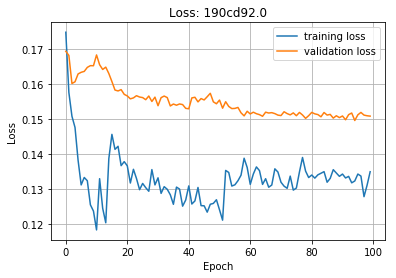

In [4]:
milsed.eval.report_results(OUTPUT_PATH, '190cd92.0')

Compare with 190cd92.3: the equivalent CNN model (but note capacity is much smaller, 25k vs 177k)

Model     190cd92.3

Weak:
recall    0.097
precision 0.306
f1        0.148

Strong:
precision 0.136
recall    0.293
f1        0.186
e_rate    1.986

Strong per-class:                       P	R	F	E
Car alarm                               0.333	0.146	0.203	1.146
Fire engine, fire truck (siren)         0.218	0.461	0.296	2.196
Train                                   0.322	0.075	0.122	1.083
Car                                     0.093	0.884	0.168	8.739
Police car (siren)                      0.197	0.528	0.287	2.624
Train horn                              0.360	0.265	0.305	1.206
Bicycle                                 0.058	0.429	0.102	7.565
Air horn, truck horn                    0.368	0.182	0.244	1.130
Civil defense siren                     0.295	0.641	0.404	1.893
Car passing by                          nan	0.000	nan	1.000
Screaming                               0.120	0.249	0.162	2.582
Truck                                   0.179	0.078	0.109	1.281
Ambulance (siren)                      

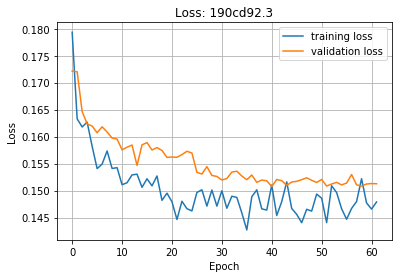

In [5]:
milsed.eval.report_results(OUTPUT_PATH, '190cd92.3')

## Second batch of models (all using SMP)

bf9940f.1 (pid 1596156): 1:40hr: cnn1d2_smp, new default params (2048 streams, decay rate of 4), no aug

bf9940f.7 (pid 1600614): crnn2d_smp, new defaults, no aug

bf9940f.3 (pid 1596177): cnn1d2_smp, new defaults, AUGMENT

bf9940f.4 (pid 1596208): crnn2d_smp, new defaults, AUGMENT

bf9940f.5 (pid 1596209): crnn1d_smp, new defaults, AUGMENT

bf9940f.6 (pid 1596210): cnn1d_smp, new defaults, AUGMENT

In [5]:
# ALL WITH SMP
# Compare small CNN1D (25k) with CNN1D that has same capacity as crnn (177k) with CRNN1D (177k)
models2 = ['190cd92.3', 'bf9940f.1', '190cd92.0']

In [6]:
milsed.eval.compare_results(OUTPUT_PATH, models2)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
1,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
2,bf9940f.1,cnn1d2_smp,176981,0.1868,0.380711,0.123762,0.22435,0.14679,0.475688,2.81101


In [14]:
params = json.load(open(os.path.join(OUTPUT_PATH, '190cd92.3', 'params.json'), 'r'))

In [15]:
params

{'alpha': 1.0,
 'augment': False,
 'batch_size': 32,
 'duration': 10.0,
 'early_stopping': 20,
 'epoch_size': 512,
 'epochs': 100,
 'max_samples': 128,
 'modelname': 'cnn1d_smp',
 'rate': 8,
 'reduce_lr': 10,
 'seed': 20170612,
 'strong_labels_file': '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_strong_label_testing_set.csv',
 'train_streamers': 1024,
 'validation_size': 1024,
 'verbose': False,
 'working': '/beegfs/js7561/datasets/dcase2017/task4_official/combined/features_silence/'}

## All models that have managed to train so far (some still running)

* crnn1d_smp: 190cd92.0 (pid 1574782): 27 hours
* crnn1d_max: 190cd92.1 (pid 1574783): 7 hours
* crnn1d_avg: 190cd92.2 (pid 1574944): 27 hours
* cnn1d_smp: 190cd92.3 (pid 1574945): completed.
* cnn1d_max: 190cd92.4 (pid 1574946): completed.
* cnn1d_avg: 190cd92.5 (pid 1574948): completed.
* crnn2d_smp: bb949b2.4 (pid 1641166): completed.
* cnn1d2_smp: bf9940f.1 (pid 1596156): 1:40hr
* cbhg_smp: 32e1f20.0 (pid 1627628): compelted.
* crnn2d2_smp: bb949b2.1 (pid 1641147): 4:22

In [3]:
models3 = (['190cd92.0', '190cd92.1', '190cd92.2', '190cd92.3', '190cd92.4', '190cd92.5', 
            'bb949b2.4', 'bf9940f.1', '32e1f20.0', 'bb949b2.1']) 
milsed.eval.compare_results(OUTPUT_PATH, models3)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
1,190cd92.1,crnn1d_max,177237,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
2,190cd92.2,crnn1d_avg,177237,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
3,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
4,190cd92.4,cnn1d_max,25749,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
5,190cd92.5,cnn1d_avg,25749,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298
6,bb949b2.4,crnn2d_smp,4569877,0.250292,0.429719,0.176568,0.25421,0.167406,0.527982,2.65161
7,bf9940f.1,cnn1d2_smp,176981,0.1868,0.380711,0.123762,0.22435,0.14679,0.475688,2.81101
8,32e1f20.0,cbhg_smp,3408657,0.168317,0.336634,0.112211,0.234322,0.180148,0.335092,1.6055
9,bb949b2.1,crnn2d2_smp,1424149,0.207065,0.395349,0.140264,0.262791,0.246827,0.280963,1.13876


In [4]:
models4 = (['190cd92.0', 'bb949b2.4', '32e1f20.0', 'bb949b2.1']) 
milsed.eval.compare_results(OUTPUT_PATH, models4)

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
1,bb949b2.4,crnn2d_smp,4569877,0.250292,0.429719,0.176568,0.25421,0.167406,0.527982,2.65161
2,32e1f20.0,cbhg_smp,3408657,0.168317,0.336634,0.112211,0.234322,0.180148,0.335092,1.6055
3,bb949b2.1,crnn2d2_smp,1424149,0.207065,0.395349,0.140264,0.262791,0.246827,0.280963,1.13876


## Compare models with/without augmetation

* crnn1d_smp: 190cd92.0 (pid 1574782): 27 hours
* crnn1d_smp[aug][repeat]: 4f1bfbc.5 (pid 1674934): completed
* crnn1d_max: 190cd92.1 (pid 1574783): 7 hours
* crnn1d_avg: 190cd92.2 (pid 1574944): 27 hours
* cnn1d_smp: 190cd92.3 (pid 1574945): completed.
* cnn1d_smp[aug][repeat]:  4f1bfbc.6 (pid 1674937): 5 hours.
* cnn1d_max: 190cd92.4 (pid 1574946): completed.
* cnn1d_avg: 190cd92.5 (pid 1574948): completed.
* crnn2d_smp: bb949b2.4 (pid 1641166): timeout after 48 hours
* crnn2d_smp[repeat]: 4f1bfbc.7 (will be 4f1bfbc.7) (pid 1674939): completed
* crnn2d_smp[aug]: 4f1bfbc.1 (pid 1650675): 30 hours 
* cnn1d2_smp: bf9940f.1 (pid 1596156): 1:40hr
* cnn1d2_smp[aug]: 4f1bfbc.2 (pid 1650683): 5:25 hours 
* cbhg_smp: 32e1f20.0 (pid 1627628): 33 hours
* cbhg_smp[aug]: 4f1bfbc.3 (pid 1650687): 22 hours
* crnn2d2_smp: bb949b2.1 (pid 1641147): 4:22
* crnn2d2_smp[aug]: 4f1bfbc.4 (pid 1650765): 2:32 hours

In [9]:
models5 = (['190cd92.0', '4f1bfbc.5', '190cd92.1', '190cd92.2', '190cd92.3', '4f1bfbc.6', '190cd92.4', 
            '190cd92.5', 'bb949b2.4', '4f1bfbc.7', '4f1bfbc.1', 'bf9940f.1', '4f1bfbc.2', '32e1f20.0', '4f1bfbc.3',
            'bb949b2.1', '4f1bfbc.4'])

In [10]:
df5 = milsed.eval.compare_results(OUTPUT_PATH, models5)

In [11]:
df5

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,190cd92.0,crnn1d_smp,177237,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
1,4f1bfbc.5,crnn1d_smp,177237,0.243056,0.406977,0.173267,0.256195,0.212515,0.322477,1.37867
2,190cd92.1,crnn1d_max,177237,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
3,190cd92.2,crnn1d_avg,177237,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
4,190cd92.3,cnn1d_smp,25749,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
5,4f1bfbc.6,cnn1d_smp,25749,0.159902,0.31401,0.107261,0.196475,0.139461,0.332339,2.15917
6,190cd92.4,cnn1d_max,25749,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
7,190cd92.5,cnn1d_avg,25749,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298
8,bb949b2.4,crnn2d_smp,4569877,0.250292,0.429719,0.176568,0.25421,0.167406,0.527982,2.65161
9,4f1bfbc.7,crnn2d_smp,4569877,0.264064,0.433962,0.189769,0.280413,0.194704,0.500917,2.11193


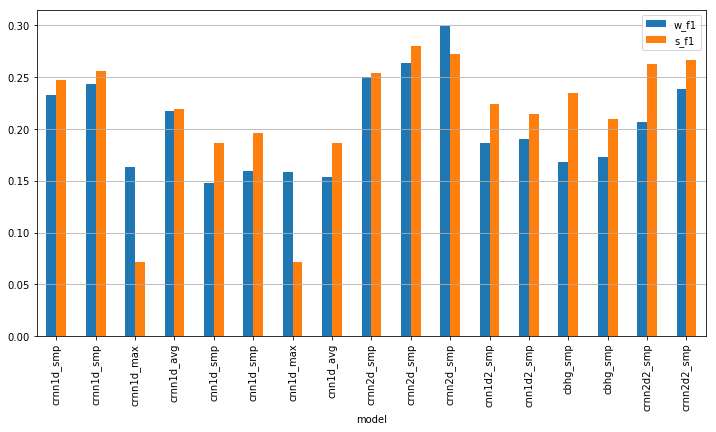

In [12]:
df5.plot.bar(x='model', y=['w_f1', 's_f1'], figsize=(12,6))
plt.grid(axis='y')

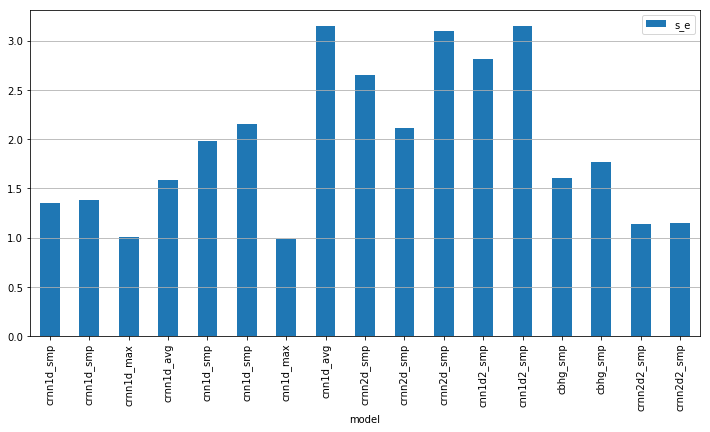

In [13]:
df5.plot.bar(x='model', y=['s_e'], figsize=(12,6))
plt.grid(axis='y')

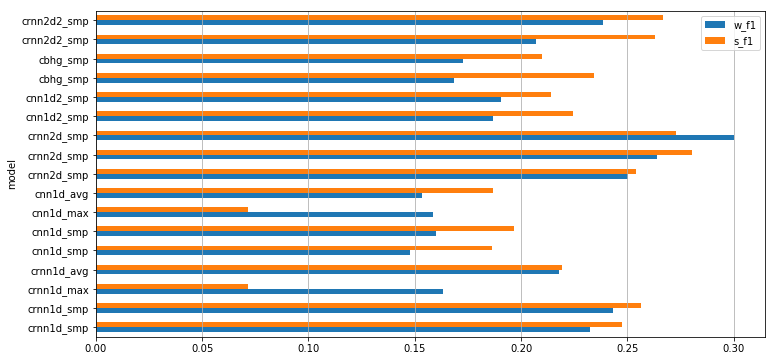

In [14]:
df5.plot.barh(x='model', y=['w_f1', 's_f1'], figsize=(12,6))
plt.grid(axis='x')

In [15]:
df5['s_e10'] = df5['s_e'] * 0.1

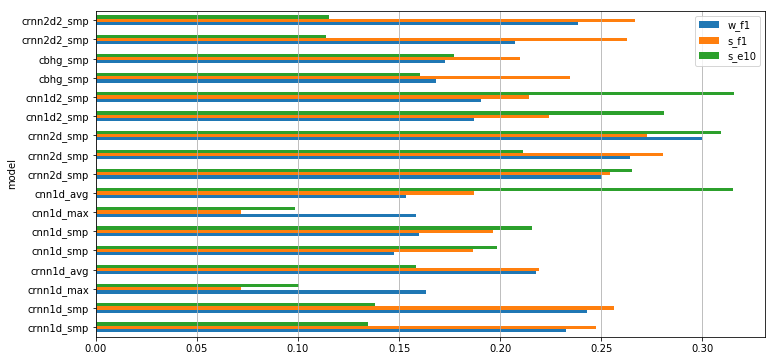

In [16]:
df5.plot.barh(x='model', y=['w_f1', 's_f1', 's_e10'], figsize=(12,6))
plt.grid(axis='x')

## Compare CRNN2D vs CRNN2D2

Model     4f1bfbc.1

Weak:
precision 0.498
f1        0.300
recall    0.215

Strong:
precision 0.173
recall    0.644
f1        0.273
e_rate    3.094

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.362	0.479	0.413	1.365
Ambulance (siren)                       0.299	0.454	0.361	1.609
Bicycle                                 0.068	0.547	0.120	7.988
Bus                                     0.152	0.591	0.241	3.720
Car                                     0.096	0.930	0.175	8.793
Car alarm                               0.282	0.323	0.301	1.500
Car passing by                          0.101	0.159	0.124	2.259
Civil defense siren                     0.420	0.890	0.570	1.341
Fire engine, fire truck (siren)         0.224	0.763	0.346	2.882
Motorcycle                              0.107	0.653	0.184	5.775
Police car (siren)                      0.218	0.804	0.343	3.085
Reversing beeps                         0.322	0.438	0.371	1.483
Screaming                          

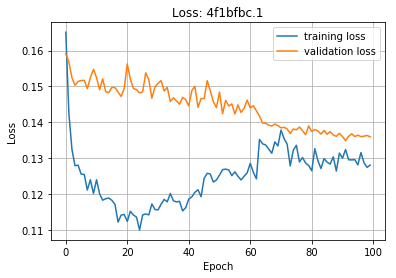

In [17]:
# CRNN2D
milsed.eval.report_results(OUTPUT_PATH, '4f1bfbc.1')

Model     4f1bfbc.4

Weak:
precision 0.429
f1        0.238
recall    0.165

Strong:
precision 0.248
recall    0.289
f1        0.267
e_rate    1.152

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.500	0.010	0.020	1.000
Ambulance (siren)                       0.313	0.188	0.235	1.225
Bicycle                                 0.062	0.031	0.041	1.435
Bus                                     0.050	0.018	0.026	1.323
Car                                     0.134	0.669	0.223	4.667
Car alarm                               nan	0.000	nan	1.000
Car passing by                          0.184	0.036	0.060	1.124
Civil defense siren                     0.579	0.797	0.671	0.783
Fire engine, fire truck (siren)         0.392	0.542	0.455	1.299
Motorcycle                              0.204	0.183	0.193	1.531
Police car (siren)                      0.285	0.458	0.351	1.690
Reversing beeps                         nan	0.000	nan	1.000
Screaming                               0.1

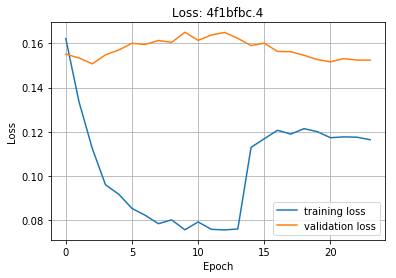

In [18]:
# CRNN2D2
milsed.eval.report_results(OUTPUT_PATH, '4f1bfbc.4')

### Inspect filters of the two models

In [19]:
pump = pickle.load(open('/home/js7561/dev/milsed/models/resources/pump.pkl', 'rb'))
crnn2d, _, _ = milsed.models.MODELS['crnn2d_smp'](pump, 1.0)
weightfile = '/home/js7561/dev/milsed/models/resources/4f1bfbc.1/model.h5'
crnn2d.load_weights(weightfile)

In [9]:
w = crnn2d.get_weights()

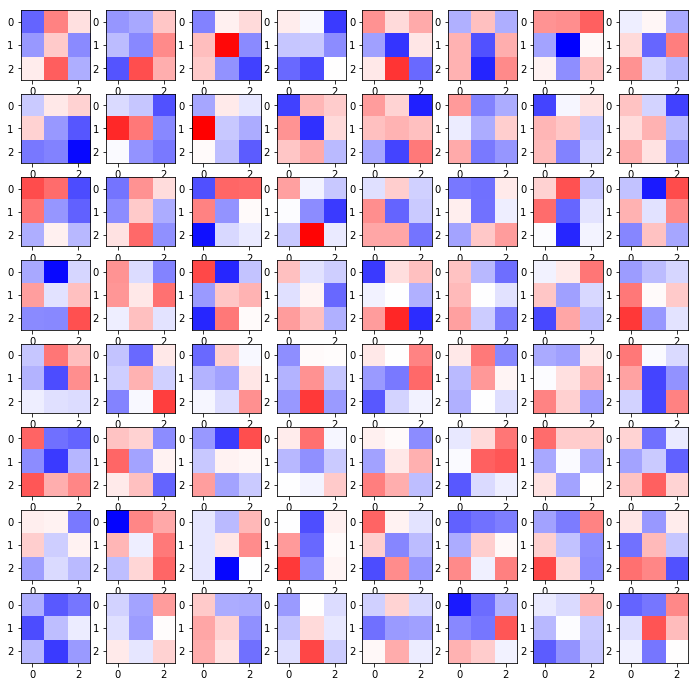

In [34]:
fig, axes = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        idx = i*8 + j
        filt = w[4]
        filt = filt[:, :, 0, idx]
        axes[i, j].imshow(filt, cmap='bwr', interpolation='nearest', vmin=w[4].min(), vmax=w[4].max())

In [22]:
w[4].shape

(3, 3, 1, 64)

In [23]:
crnn2d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mel/mag (InputLayer)         (None, None, 128, 1)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, None, 128, 1)      4         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, 128, 64)     640       
_________________________________________________________________
batch_normalization_8 (Batch (None, None, 128, 64)     256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, 128, 128)    73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, None, 128, 128)    512       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, None, 1, 256)      4194560   
__________

In [35]:
pump = pickle.load(open('/home/js7561/dev/milsed/models/resources/pump.pkl', 'rb'))
crnn2d2, _, _ = milsed.models.MODELS['crnn2d2_smp'](pump, 1.0)
weightfile = '/home/js7561/dev/milsed/models/resources/4f1bfbc.4/model.h5'
crnn2d2.load_weights(weightfile)

In [36]:
crnn2d2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mel/mag (InputLayer)         (None, None, 128, 1)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, None, 128, 1)      4         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, None, 128, 64)     640       
_________________________________________________________________
batch_normalization_11 (Batc (None, None, 128, 64)     256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, 64, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, None, 64, 128)     73856     
_________________________________________________________________
batch_normalization_12 (Batc (None, None, 64, 128)     512       
__________

In [37]:
w2 = crnn2d2.get_weights()

In [41]:
for l in w2:
    print(l.shape)

(1,)
(1,)
(1,)
(1,)
(3, 3, 1, 64)
(64,)
(64,)
(64,)
(64,)
(64,)
(3, 3, 64, 128)
(128,)
(128,)
(128,)
(128,)
(128,)
(1, 32, 128, 256)
(256,)
(256, 384)
(128, 384)
(384,)
(256, 384)
(128, 384)
(384,)
(256, 17)
(17,)


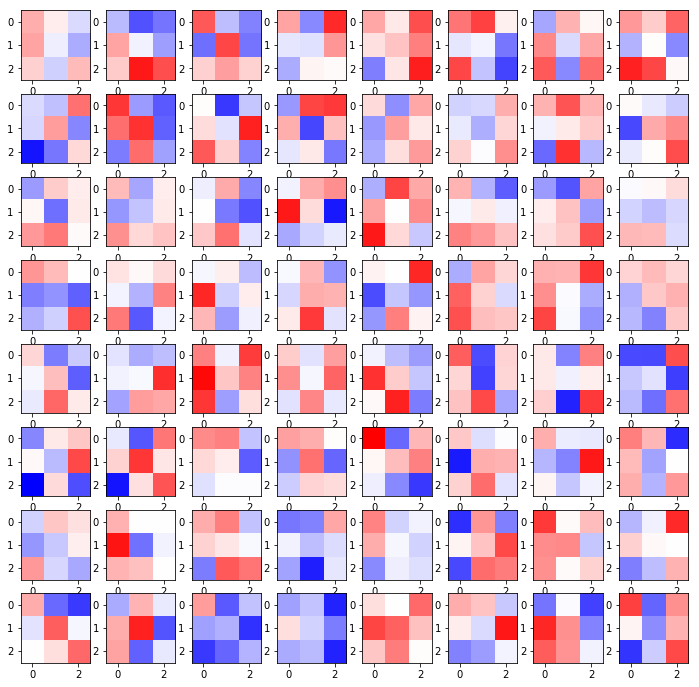

In [42]:
fig, axes = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        idx = i*8 + j
        filt = w2[4]
        filt = filt[:, :, 0, idx]
        axes[i, j].imshow(filt, cmap='bwr', interpolation='nearest', vmin=w2[4].min(), vmax=w2[4].max())

### crnn2d_smp without augmentation

In [20]:
# CRNN2D_smp without augmentation
milsed.eval.report_results(OUTPUT_PATH, 'bb949b2.4')

Model     bb949b2.4

Weak:
precision 0.430
f1        0.250
recall    0.177

Strong:
precision 0.167
recall    0.528
f1        0.254
e_rate    2.652

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.325	0.135	0.191	1.146
Ambulance (siren)                       0.314	0.336	0.324	1.399
Bicycle                                 0.083	0.447	0.140	5.484
Bus                                     0.113	0.444	0.180	4.043
Car                                     0.117	0.909	0.207	6.962
Car alarm                               0.190	0.122	0.149	1.396
Car passing by                          0.102	0.239	0.143	2.857
Civil defense siren                     0.467	0.834	0.599	1.117
Fire engine, fire truck (siren)         0.205	0.688	0.316	2.978
Motorcycle                              0.109	0.451	0.176	4.230
Police car (siren)                      0.218	0.731	0.336	2.886
Reversing beeps                         0.452	0.216	0.292	1.045
Screaming                          

FileNotFoundError: [Errno 2] No such file or directory: '/home/js7561/dev/milsed/models/resources/bb949b2.4/history.pkl'

In [21]:
history = pickle.load(open('/home/js7561/dev/milsed/models/resources/model001/history_checkpoint.pkl', 'rb'))

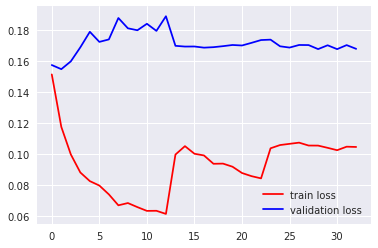

In [25]:
plt.plot(history['loss'], 'r', label='train loss')
plt.plot(history['val_loss'], 'b', label='validation loss')
plt.legend()

## Inspect crnn2d3, smaller model, with/without augmentation

In [27]:
models6 = ['model001', 'model002']

In [29]:
# STATUS:
# model001 completed after 8 hours
# model002 trained for 13 hours, still running
df6 = milsed.eval.compare_results(OUTPUT_PATH, models6, sort=False)

In [30]:
df6

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model001,crnn2d3_smp,419797,0.208333,0.404762,0.140264,0.254483,0.218652,0.304358,1.29083
1,model002,crnn2d3_smp,419797,0.232558,0.353535,0.173267,0.251457,0.181229,0.41055,1.93349


Model     model001

Weak:
f1        0.208
recall    0.140
precision 0.405

Strong:
precision 0.219
recall    0.304
f1        0.254
e_rate    1.291

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.667	0.021	0.040	0.990
Ambulance (siren)                       0.409	0.140	0.209	1.063
Bicycle                                 0.154	0.193	0.171	1.863
Bus                                     0.130	0.233	0.167	2.326
Car                                     0.132	0.726	0.223	5.062
Car alarm                               0.143	0.006	0.012	1.030
Car passing by                          0.031	0.012	0.017	1.359
Civil defense siren                     0.641	0.714	0.675	0.686
Fire engine, fire truck (siren)         0.302	0.530	0.385	1.695
Motorcycle                              0.207	0.268	0.234	1.756
Police car (siren)                      0.267	0.513	0.351	1.893
Reversing beeps                         0.531	0.097	0.163	0.989
Screaming                           

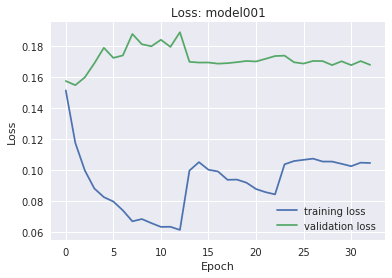

In [3]:
milsed.eval.report_results(OUTPUT_PATH, 'model001')

Model     model002

Weak:
recall    0.173
f1        0.233
precision 0.354

Strong:
precision 0.181
recall    0.411
f1        0.251
e_rate    1.933

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.349	0.266	0.302	1.229
Ambulance (siren)                       0.258	0.188	0.217	1.354
Bicycle                                 0.121	0.391	0.185	3.447
Bus                                     0.093	0.269	0.139	3.344
Car                                     0.102	0.753	0.180	6.852
Car alarm                               0.471	0.098	0.162	1.012
Car passing by                          0.080	0.151	0.105	2.594
Civil defense siren                     0.529	0.855	0.653	0.907
Fire engine, fire truck (siren)         0.280	0.579	0.378	1.910
Motorcycle                              0.122	0.371	0.184	3.291
Police car (siren)                      0.250	0.631	0.358	2.258
Reversing beeps                         0.176	0.034	0.057	1.125
Screaming                           

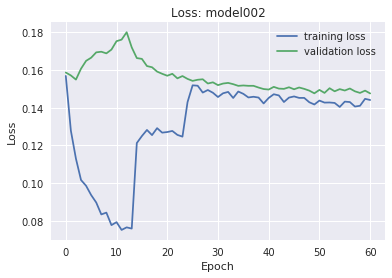

In [4]:
milsed.eval.report_results(OUTPUT_PATH, 'model002')

The latter's training pattern looks better. Still, perhaps the gradient isn't reaching the conv layers, so try adding batch norm after last conv layer and before the GRU --> crnn2d4

## crnn2d4 with/without augmentation

In [4]:
# STATUS:
# model001: crnn2d3:       completed after 8 hours
# model002: crnn2d3[aug]:  completed after 28 hours
# model003: crnn2d4:       completed after 11 hours
# model004: crnn2d4[aug]:  running for 29 hours...
# model005: crnnL3[aug]:   running for 23 hours...
# model006: crnnL3_2[aug]: completed after 15 hours
models7 = ['model001', 'model002', 'model003', 'model004', 'model005', 'model006']
df7 = milsed.eval.compare_results(OUTPUT_PATH, models7, sort=False)
df7

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model001,crnn2d3_smp,419797,0.208333,0.404762,0.140264,0.254483,0.218652,0.304358,1.29083
1,model002,crnn2d3_smp,419797,0.233971,0.367491,0.171617,0.251174,0.179672,0.417202,1.98119
2,model003,crnn2d4_smp,420053,0.278243,0.38,0.219472,0.228426,0.155306,0.431651,2.45344
3,model004,crnn2d4_smp,420053,0.307182,0.464883,0.229373,0.259622,0.171132,0.537615,2.65092
4,model005,crnnL3_smp,9781205,0.34525,0.453083,0.278878,0.320092,0.294731,0.350229,1.10826
5,model006,crnnL3_2_smp,858629,0.375262,0.514368,0.29538,0.361191,0.326952,0.40344,1.06628


Model     model003

Weak:
f1        0.278
precision 0.380
recall    0.219

Strong:
precision 0.155
recall    0.432
f1        0.228
e_rate    2.453

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.248	0.302	0.272	1.615
Ambulance (siren)                       0.332	0.232	0.273	1.236
Bicycle                                 0.072	0.335	0.119	4.975
Bus                                     0.065	0.269	0.104	4.627
Car                                     0.107	0.798	0.188	6.882
Car alarm                               0.140	0.091	0.111	1.470
Car passing by                          0.033	0.143	0.053	5.092
Civil defense siren                     0.491	0.721	0.584	1.028
Fire engine, fire truck (siren)         0.279	0.645	0.390	2.019
Motorcycle                              0.068	0.300	0.111	4.826
Police car (siren)                      0.247	0.520	0.335	2.066
Reversing beeps                         0.397	0.341	0.367	1.176
Screaming                           

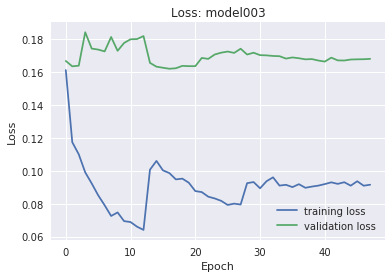

In [7]:
milsed.eval.report_results(OUTPUT_PATH, 'model003')

Model     model004

Weak:
f1        0.307
precision 0.465
recall    0.229

Strong:
precision 0.171
recall    0.538
f1        0.260
e_rate    2.651

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.367	0.359	0.363	1.260
Ambulance (siren)                       0.345	0.358	0.351	1.321
Bicycle                                 0.074	0.460	0.127	6.329
Bus                                     0.113	0.477	0.182	4.280
Car                                     0.101	0.823	0.180	7.500
Car alarm                               0.277	0.189	0.225	1.305
Car passing by                          0.061	0.327	0.103	5.681
Civil defense siren                     0.616	0.814	0.701	0.693
Fire engine, fire truck (siren)         0.257	0.670	0.371	2.268
Motorcycle                              0.122	0.474	0.194	3.930
Police car (siren)                      0.233	0.583	0.333	2.332
Reversing beeps                         0.188	0.205	0.196	1.676
Screaming                           

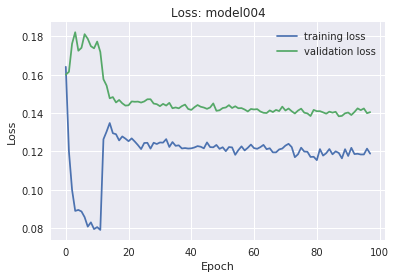

In [8]:
milsed.eval.report_results(OUTPUT_PATH, 'model004')

Model     model005

Weak:
f1        0.345
precision 0.453
recall    0.279

Strong:
precision 0.295
recall    0.350
f1        0.320
e_rate    1.108

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.600	0.234	0.337	0.922
Ambulance (siren)                       0.583	0.103	0.176	0.970
Bicycle                                 0.145	0.205	0.170	2.006
Bus                                     0.196	0.115	0.145	1.355
Car                                     0.144	0.645	0.235	4.204
Car alarm                               0.333	0.049	0.085	1.049
Car passing by                          0.179	0.088	0.118	1.315
Civil defense siren                     0.613	0.848	0.712	0.686
Fire engine, fire truck (siren)         0.355	0.486	0.410	1.399
Motorcycle                              0.227	0.244	0.235	1.587
Police car (siren)                      0.353	0.542	0.428	1.450
Reversing beeps                         0.640	0.324	0.430	0.858
Screaming                           

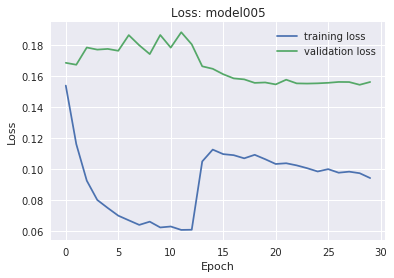

In [9]:
milsed.eval.report_results(OUTPUT_PATH, 'model005')

Model     model006

Weak:
f1        0.375
precision 0.514
recall    0.295

Strong:
precision 0.327
recall    0.403
f1        0.361
e_rate    1.066

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.600	0.250	0.353	0.917
Ambulance (siren)                       0.570	0.196	0.291	0.952
Bicycle                                 0.276	0.311	0.292	1.503
Bus                                     0.269	0.179	0.215	1.308
Car                                     0.153	0.758	0.255	4.430
Car alarm                               0.625	0.091	0.160	0.963
Car passing by                          0.107	0.032	0.049	1.235
Civil defense siren                     0.616	0.872	0.722	0.672
Fire engine, fire truck (siren)         0.388	0.542	0.452	1.315
Motorcycle                              0.362	0.432	0.394	1.329
Police car (siren)                      0.335	0.498	0.401	1.491
Reversing beeps                         0.762	0.364	0.492	0.750
Screaming                           

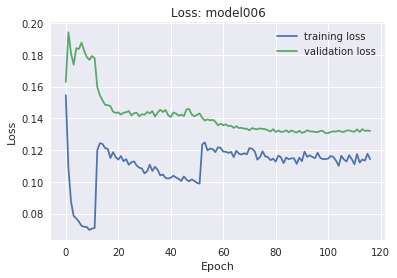

In [11]:
milsed.eval.report_results(OUTPUT_PATH, 'model006')

# Side note: class distribution in train/test set

In [15]:
traincsv = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_weak_label_training_set.csv'
testcsv = '/beegfs/js7561/datasets/dcase2017/task4_official/combined/metadata/labels/groundtruth_weak_label_testing_set.csv'

In [24]:
trainlabels = pd.read_csv(traincsv, sep='\t', header=None)
trainlabels.columns = ['filename', 'start_time', 'end_time', 'label']

In [31]:
trainlabels.label.value_counts()

Car                                25077
Truck                               6885
Bus                                 3617
Car passing by                      3598
Motorcycle                          3162
Police car (siren)                  2364
Fire engine, fire truck (siren)     2288
Train                               2075
Bicycle                             1897
Skateboard                          1516
Civil defense siren                 1409
Screaming                            636
Ambulance (siren)                    524
Train horn                           345
Air horn, truck horn                 313
Reversing beeps                      245
Car alarm                            180
Name: label, dtype: int64

In [32]:
testlabels = pd.read_csv(testcsv, sep='\t', header=None)
testlabels.columns = ['filename', 'start_time', 'end_time', 'label']

In [33]:
testlabels.label.value_counts()

Car                                60
Truck                              60
Train                              50
Police car (siren)                 35
Fire engine, fire truck (siren)    35
Car passing by                     32
Ambulance (siren)                  32
Bus                                31
Civil defense siren                31
Train horn                         30
Motorcycle                         30
Bicycle                            30
Car alarm                          30
Reversing beeps                    30
Air horn, truck horn               30
Screaming                          30
Skateboard                         30
Name: label, dtype: int64

## Updated results for current set of models

In [3]:
# STATUS:
# model001: crnn2d3:       completed after 8 hours
# model002: crnn2d3[aug]:  completed after 28 hours
# model003: crnn2d4:       completed after 11 hours
# model004: crnn2d4[aug]:  completed after 34 hours
# model005: crnnL3[aug]:   completed after 64 hours
# model006: crnnL3_2[aug]: completed after 15 hours
# model007: crnnL3_3[aug]: completed after 21 hours
# model008: crnnL3_4[aug]: completed after 15 hours
# model009: crnnL3_4[aug]: completed after 13 hours
# model010: crnnL3_4[aug]: completed after 14 hours
# model011: crnnL3_4[aug]: completed after 16 hours
# model012: crnnL3_4[aug]: completed after 16 hours
models8 = (['model001', 'model002', 'model003', 'model004', 'model005', 'model006', 
            'model007', 'model008', 'model009', 'model010', 'model011', 'model012'])
df8 = milsed.eval.compare_results(OUTPUT_PATH, models8, sort=False)
df8

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model001,crnn2d3_smp,419797,0.208333,0.404762,0.140264,0.254483,0.218652,0.304358,1.29083
1,model002,crnn2d3_smp,419797,0.233971,0.367491,0.171617,0.251174,0.179672,0.417202,1.98119
2,model003,crnn2d4_smp,420053,0.278243,0.38,0.219472,0.228426,0.155306,0.431651,2.45344
3,model004,crnn2d4_smp,420053,0.319196,0.493103,0.235974,0.261299,0.170019,0.56422,2.78853
4,model005,crnnL3_smp,9781205,0.396266,0.53352,0.315182,0.357378,0.323716,0.398853,1.08532
5,model006,crnnL3_2_smp,858629,0.382046,0.519886,0.30198,0.368324,0.333519,0.411239,1.0617
6,model007,crnnL3_3_smp,858629,0.414006,0.550685,0.331683,0.381205,0.343646,0.427982,1.06284
7,model008,crnnL3_4_smp,2205957,0.39375,0.533898,0.311881,0.376655,0.368791,0.384862,0.966743
8,model009,crnnL3_5_smp,1154309,0.371245,0.530675,0.285479,0.373906,0.370579,0.377294,0.955734
9,model010,crnnL3_6_smp,2501637,0.375267,0.53012,0.290429,0.359489,0.375031,0.345183,0.94633


Model     model008

Weak:
recall    0.312
f1        0.394
precision 0.534

Strong:
precision 0.369
recall    0.385
f1        0.377
e_rate    0.967

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.570	0.255	0.353	0.938
Ambulance (siren)                       0.471	0.122	0.194	1.015
Bicycle                                 0.249	0.280	0.263	1.565
Bus                                     0.267	0.154	0.195	1.269
Car                                     0.184	0.624	0.284	3.151
Car alarm                               0.415	0.104	0.166	1.043
Car passing by                          0.036	0.004	0.007	1.104
Civil defense siren                     0.641	0.831	0.724	0.634
Fire engine, fire truck (siren)         0.445	0.607	0.514	1.150
Motorcycle                              0.318	0.347	0.332	1.399
Police car (siren)                      0.416	0.579	0.485	1.232
Reversing beeps                         0.713	0.466	0.564	0.722
Screaming                           

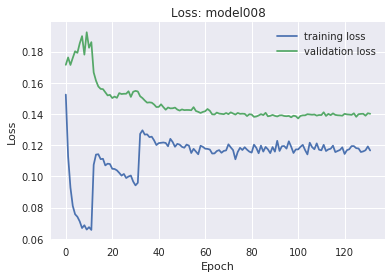

In [5]:
milsed.eval.report_results(OUTPUT_PATH, 'model008')

Model     model011

Weak:
recall    0.320
f1        0.398
precision 0.526

Strong:
precision 0.383
recall    0.387
f1        0.385
e_rate    0.938

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.513	0.203	0.291	0.990
Ambulance (siren)                       0.484	0.162	0.243	1.011
Bicycle                                 0.200	0.248	0.222	1.745
Bus                                     0.353	0.168	0.228	1.140
Car                                     0.186	0.720	0.296	3.425
Car alarm                               0.731	0.116	0.200	0.927
Car passing by                          0.042	0.004	0.007	1.088
Civil defense siren                     0.681	0.903	0.776	0.521
Fire engine, fire truck (siren)         0.427	0.495	0.459	1.168
Motorcycle                              0.365	0.357	0.361	1.263
Police car (siren)                      0.461	0.550	0.502	1.092
Reversing beeps                         0.731	0.324	0.449	0.795
Screaming                           

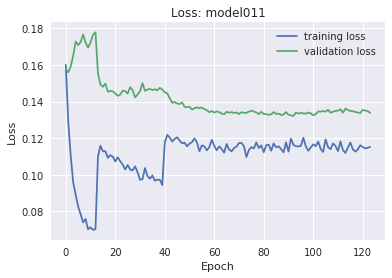

In [7]:
milsed.eval.report_results(OUTPUT_PATH, 'model011')

Model     model012

Weak:
recall    0.274
f1        0.355
precision 0.506

Strong:
precision 0.339
recall    0.330
f1        0.334
e_rate    1.014

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.453	0.224	0.300	1.047
Ambulance (siren)                       0.265	0.033	0.059	1.059
Bicycle                                 0.213	0.217	0.215	1.584
Bus                                     0.126	0.068	0.088	1.405
Car                                     0.167	0.677	0.268	3.702
Car alarm                               0.458	0.067	0.117	1.012
Car passing by                          0.133	0.008	0.015	1.044
Civil defense siren                     0.696	0.876	0.776	0.507
Fire engine, fire truck (siren)         0.427	0.505	0.463	1.171
Motorcycle                              0.379	0.315	0.344	1.202
Police car (siren)                      0.330	0.428	0.372	1.443
Reversing beeps                         0.800	0.318	0.455	0.761
Screaming                           

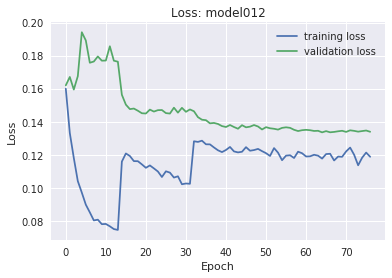

In [8]:
milsed.eval.report_results(OUTPUT_PATH, 'model012')

Model     model012

Weak:
f1        0.357
recall    0.274
precision 0.511

Strong:
precision 0.341
recall    0.325
f1        0.333
e_rate    1.004

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.495	0.260	0.341	1.005
Ambulance (siren)                       0.260	0.048	0.081	1.089
Bicycle                                 0.280	0.217	0.245	1.342
Bus                                     0.148	0.068	0.093	1.323
Car                                     0.161	0.659	0.258	3.782
Car alarm                               0.550	0.067	0.120	0.988
Car passing by                          0.048	0.004	0.007	1.076
Civil defense siren                     0.662	0.879	0.756	0.569
Fire engine, fire truck (siren)         0.426	0.452	0.439	1.156
Motorcycle                              0.375	0.338	0.356	1.225
Police car (siren)                      0.316	0.424	0.362	1.494
Reversing beeps                         0.817	0.330	0.470	0.744
Screaming                           

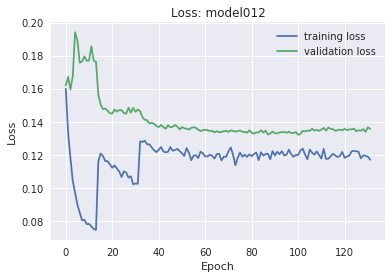

In [4]:
milsed.eval.report_results(OUTPUT_PATH, 'model012')

### Model011 seems like the best approach so far?

## Add DRC data and test conv-conv-conv-pool models

In [7]:
# STATUS:
# model005: crnnL3[aug]:   completed after 64 hours
# model006: crnnL3_2[aug]: completed after 15 hours
# model007: crnnL3_3[aug]: completed after 21 hours
# model008: crnnL3_4[aug]: completed after 15 hours
# model009: crnnL3_4[aug]: completed after 13 hours
# model010: crnnL3_4[aug]: completed after 14 hours
# model011: crnnL3_4[aug]: completed after 16 hours
# model012: crnnL3_4[aug]: completed after 16 hours
# model013: crnnL3_4[aug]: running for 14 hours...
# model014: crnnL3_4[aug]: running for 14 hours...
# model015: crnnL3_4[aug]: running for 14 hours...
# model016: crnnL3_4[aug]: running for 14 hours...
models9 = (['model005', 'model006', 'model007', 'model008', 'model009', 'model010', 
            'model011', 'model012', 'model013', 'model014', 'model015', 'model016'])
df9 = milsed.eval.compare_results(OUTPUT_PATH, models9, sort=False)
df9

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model005,crnnL3_smp,9781205,0.396266,0.53352,0.315182,0.357378,0.323716,0.398853,1.08532
1,model006,crnnL3_2_smp,858629,0.382046,0.519886,0.30198,0.368324,0.333519,0.411239,1.0617
2,model007,crnnL3_3_smp,858629,0.414006,0.550685,0.331683,0.381205,0.343646,0.427982,1.06284
3,model008,crnnL3_4_smp,2205957,0.39375,0.533898,0.311881,0.376655,0.368791,0.384862,0.966743
4,model009,crnnL3_5_smp,1154309,0.371245,0.530675,0.285479,0.373906,0.370579,0.377294,0.955734
5,model010,crnnL3_6_smp,2501637,0.375267,0.53012,0.290429,0.359489,0.375031,0.345183,0.94633
6,model011,crnnL3_7_smp,1449989,0.397949,0.525745,0.320132,0.385265,0.383167,0.387385,0.937844
7,model012,crnnL3_8_smp,2797317,0.356606,0.510769,0.273927,0.332981,0.34086,0.325459,1.00367
8,model013,crnnL3_7_smp,1449989,0.384937,0.525714,0.30363,0.367023,0.367996,0.366055,0.936927
9,model014,crnnL3_8_smp,2797317,0.338362,0.487578,0.259076,0.327746,0.335171,0.320642,0.999771


In [8]:
# Save but now USE_ORIG_DURATIONS = TRUE
models10 = (['model005', 'model006', 'model007', 'model008', 'model009', 'model010', 
             'model011', 'model012', 'model013', 'model014', 'model015', 'model016'])
df10 = milsed.eval.compare_results(OUTPUT_PATH, models10, sort=False)
df10

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model005,crnnL3_smp,9781205,0.396266,0.53352,0.315182,0.372652,0.350141,0.398256,0.991741
1,model006,crnnL3_2_smp,858629,0.382046,0.519886,0.30198,0.391399,0.373308,0.411333,0.930718
2,model007,crnnL3_3_smp,858629,0.414006,0.550685,0.331683,0.405611,0.38557,0.42785,0.927736
3,model008,crnnL3_4_smp,2205957,0.39375,0.533898,0.311881,0.390142,0.395475,0.384951,0.896536
4,model009,crnnL3_5_smp,1154309,0.371245,0.530675,0.285479,0.394201,0.412591,0.37738,0.85226
5,model010,crnnL3_6_smp,2501637,0.375267,0.53012,0.290429,0.375733,0.412103,0.345263,0.86373
6,model011,crnnL3_7_smp,1449989,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
7,model012,crnnL3_8_smp,2797317,0.356606,0.510769,0.273927,0.355016,0.390371,0.325533,0.882771
8,model013,crnnL3_7_smp,1449989,0.384937,0.525714,0.30363,0.384625,0.405076,0.366139,0.846295
9,model014,crnnL3_8_smp,2797317,0.338362,0.487578,0.259076,0.348498,0.38155,0.320716,0.883689


## Henceforth always use use_orig_duration=True for evaluation

In [4]:
# STATUS:
# model005: crnnL3[aug]:   completed after 64 hours
# model006: crnnL3_2[aug]: completed after 15 hours
# model007: crnnL3_3[aug]: completed after 21 hours
# model008: crnnL3_4[aug]: completed after 15 hours
# model009: crnnL3_4[aug]: completed after 13 hours
# model010: crnnL3_4[aug]: completed after 14 hours
# model011: crnnL3_4[aug]: completed after 16 hours
# model012: crnnL3_4[aug]: completed after 16 hours
# model013: crnnL3_4[aug]: completed after 17 hours
# model014: crnnL3_4[aug]: running for 18 hours...
# model015: crnnL3_4[aug]: running for 18 hours...
# model016: crnnL3_4[aug]: running for 18 hours...
# model017: crnnL3_4[aug]: running for 2 hours...
# model018: crnnL3_4[aug]: running for 0 hours...
models11 = (['model005', 'model006', 'model007', 'model008', 'model009', 'model010', 
             'model011', 'model012', 'model013', 'model014', 'model015', 'model016',
             'model017'])
df11 = milsed.eval.compare_results(OUTPUT_PATH, models11, sort=False)
df11

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model005,crnnL3_smp,9781205,0.396266,0.53352,0.315182,0.372652,0.350141,0.398256,0.991741
1,model006,crnnL3_2_smp,858629,0.382046,0.519886,0.30198,0.391399,0.373308,0.411333,0.930718
2,model007,crnnL3_3_smp,858629,0.414006,0.550685,0.331683,0.405611,0.38557,0.42785,0.927736
3,model008,crnnL3_4_smp,2205957,0.39375,0.533898,0.311881,0.390142,0.395475,0.384951,0.896536
4,model009,crnnL3_5_smp,1154309,0.371245,0.530675,0.285479,0.394201,0.412591,0.37738,0.85226
5,model010,crnnL3_6_smp,2501637,0.375267,0.53012,0.290429,0.375733,0.412103,0.345263,0.86373
6,model011,crnnL3_7_smp,1449989,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
7,model012,crnnL3_8_smp,2797317,0.356606,0.510769,0.273927,0.355016,0.390371,0.325533,0.882771
8,model013,crnnL3_7_smp,1449989,0.384937,0.525714,0.30363,0.384625,0.405076,0.366139,0.846295
9,model014,crnnL3_8_smp,2797317,0.330472,0.472393,0.254125,0.326919,0.334695,0.319495,1.00183


### same set of models, using weak_from_strong=True

In [6]:
models12 = (['model005', 'model006', 'model007', 'model008', 'model009', 'model010', 
             'model011', 'model012', 'model013', 'model014', 'model015', 'model016'])
df12 = milsed.eval.compare_results(OUTPUT_PATH, models12, sort=False, weak_from_strong=True)
df12

,version,model,n_weights,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
0,model005,crnnL3_smp,9781205,0.395556,0.298157,0.587459,0.372652,0.350141,0.398256,0.991741
1,model006,crnnL3_2_smp,858629,0.438457,0.348588,0.590759,0.391399,0.373308,0.411333,0.930718
2,model007,crnnL3_3_smp,858629,0.446191,0.352099,0.608911,0.405611,0.38557,0.42785,0.927736
3,model008,crnnL3_4_smp,2205957,0.432765,0.369034,0.523102,0.390142,0.395475,0.384951,0.896536
4,model009,crnnL3_5_smp,1154309,0.450995,0.407457,0.50495,0.394201,0.412591,0.37738,0.85226
5,model010,crnnL3_6_smp,2501637,0.42915,0.421304,0.437294,0.375733,0.412103,0.345263,0.86373
6,model011,crnnL3_7_smp,1449989,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
7,model012,crnnL3_8_smp,2797317,0.413355,0.398773,0.429043,0.355016,0.390371,0.325533,0.882771
8,model013,crnnL3_7_smp,1449989,0.433202,0.415781,0.452145,0.384625,0.405076,0.366139,0.846295
9,model014,crnnL3_8_smp,2797317,0.39968,0.387597,0.412541,0.347685,0.381226,0.319569,0.885524


## ONLY COMPARE BEST MODELS, WITH MACRO:

In [4]:
models13 = (['model007', 'model009', 'model011', 'model013', 'model015'])
df13 = milsed.eval.compare_results(OUTPUT_PATH, models13, sort=False, weak_from_strong=False)
df13

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model007,crnnL3_3_smp,858629,0.356613,0.414006,0.550685,0.331683,0.405611,0.38557,0.42785,0.927736
1,model009,crnnL3_5_smp,1154309,0.332203,0.371245,0.530675,0.285479,0.394201,0.412591,0.37738,0.85226
2,model011,crnnL3_7_smp,1449989,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
3,model013,crnnL3_7_smp,1449989,0.351099,0.384937,0.525714,0.30363,0.384625,0.405076,0.366139,0.846295
4,model015,crnnL3_9_smp,1647029,0.346027,0.39327,0.542029,0.308581,0.399378,0.417083,0.383115,0.830466


In [5]:
models14 = (['model007', 'model009', 'model011', 'model013', 'model015'])
df14 = milsed.eval.compare_results(OUTPUT_PATH, models14, sort=False, weak_from_strong=True)
df14

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model007,crnnL3_3_smp,858629,0.464915,0.446191,0.352099,0.608911,0.405611,0.38557,0.42785,0.927736
1,model009,crnnL3_5_smp,1154309,0.454334,0.450995,0.407457,0.50495,0.394201,0.412591,0.37738,0.85226
2,model011,crnnL3_7_smp,1449989,0.453196,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
3,model013,crnnL3_7_smp,1449989,0.427303,0.433202,0.415781,0.452145,0.384625,0.405076,0.366139,0.846295
4,model015,crnnL3_9_smp,1647029,0.439868,0.445306,0.420205,0.473597,0.399378,0.417083,0.383115,0.830466


We see that f1 (both macro and micro) goes up when we use weak_from_strong. Macro f1 is generally lower than micro f1 for weak.

# Compare best models with/without DRC

In [5]:
# model015: crnnL3_4[aug]: Completed after 20 hours
# model016: crnnL3_4[aug]: running for 22 hours...
# model017: crnnL3_4[aug]: running for 5 hours...
# model018: crnnL3_4[aug]: running for 3 hours...
models14 = (['model015', 'model016', 'model017', 'model018'])
df14 = milsed.eval.compare_results(OUTPUT_PATH, models14, sort=False, weak_from_strong=False)
df14

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model015,crnnL3_9_smp,1647029,0.346027,0.39327,0.542029,0.308581,0.399378,0.417083,0.383115,0.830466
1,model016,crnnL3_10_smp,1960245,0.276248,0.325167,0.5,0.240924,0.325563,0.373773,0.288369,0.893783
2,model017,crnnL3_9_smp,1647029,0.290338,0.33691,0.481595,0.259076,0.349508,0.366776,0.333792,0.899059
3,model018,crnnL3_10_smp,1960245,0.23909,0.28479,0.411215,0.217822,0.293847,0.320673,0.271163,0.9571


In [6]:
# model015: crnnL3_4[aug]: Completed after 20 hours
# model016: crnnL3_4[aug]: running for 22 hours...
# model017: crnnL3_4[aug]: running for 5 hours...
# model018: crnnL3_4[aug]: running for 3 hours...
models14 = (['model015', 'model016', 'model017', 'model018'])
df14 = milsed.eval.compare_results(OUTPUT_PATH, models14, sort=False, weak_from_strong=True)
df14

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model015,crnnL3_9_smp,1647029,0.439868,0.445306,0.420205,0.473597,0.399378,0.417083,0.383115,0.830466
1,model016,crnnL3_10_smp,1960245,0.363904,0.39661,0.407666,0.386139,0.325563,0.373773,0.288369,0.893783
2,model017,crnnL3_9_smp,1647029,0.375374,0.384384,0.352617,0.422442,0.349508,0.366776,0.333792,0.899059
3,model018,crnnL3_10_smp,1960245,0.327066,0.346241,0.320675,0.376238,0.293847,0.320673,0.271163,0.9571


## Evaluate some ensembles

In [4]:
models15 = (['ensemble001'])
df15 = milsed.eval.compare_results(OUTPUT_PATH, models15, sort=False, weak_from_strong=False, is_ensemble=True)
df15

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,ensemble001,ensemble001,ensemble,0.300445,0.360617,0.64135,0.250825,0.390893,0.549688,0.303281,0.775637


In [7]:
models15 = (['ensemble001'])
df15 = milsed.eval.compare_results(OUTPUT_PATH, models15, sort=False, weak_from_strong=True, is_ensemble=True)
df15

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,ensemble001,ensemble001,ensemble,0.391503,0.437181,0.573727,0.353135,0.390893,0.549688,0.303281,0.775637


## BALANCED TRAINING RESULTS

In [10]:
models15 = (['model019', 'model020'])
df15 = milsed.eval.compare_results(OUTPUT_PATH, models15, sort=False, weak_from_strong=False, is_ensemble=False)
df15

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model019,crnnL3_9_smp,1647029,0.298463,0.346692,0.398287,0.306931,0.321668,0.299881,0.346869,1.04932
1,model020,crnnL3_7_smp,1449989,0.238227,0.293936,0.389646,0.235974,0.284362,0.293529,0.275751,0.979812


In [11]:
# Compared to unbalanced training of the same:
models15 = (['model015', 'model011'])
df15 = milsed.eval.compare_results(OUTPUT_PATH, models15, sort=False, weak_from_strong=False, is_ensemble=False)
df15

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model015,crnnL3_9_smp,1647029,0.346027,0.39327,0.542029,0.308581,0.399378,0.417083,0.383115,0.830466
1,model011,crnnL3_7_smp,1449989,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854


Model     model019

Weak:
precision 0.398
recall    0.307
f1        0.347

Strong:
precision 0.300
recall    0.347
f1        0.322
e_rate    1.049

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.000	0.000	0.000	1.010
Ambulance (siren)                       0.292	0.583	0.389	1.830
Bicycle                                 nan	0.000	nan	1.000
Bus                                     0.238	0.326	0.275	1.717
Car                                     0.218	0.417	0.287	2.075
Car alarm                               0.538	0.555	0.547	0.921
Car passing by                          0.110	0.183	0.137	2.307
Civil defense siren                     0.250	0.003	0.007	1.007
Fire engine, fire truck (siren)         0.352	0.312	0.331	1.262
Motorcycle                              nan	0.000	nan	1.000
Police car (siren)                      0.360	0.181	0.241	1.140
Reversing beeps                         0.586	0.426	0.493	0.875
Screaming                               0.39

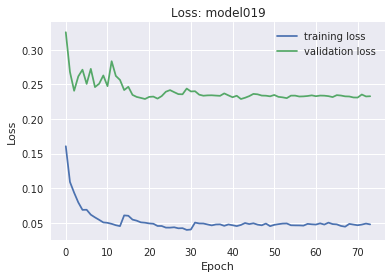

In [6]:
# Examing training curves for balanced
milsed.eval.report_results(OUTPUT_PATH, 'model019')

Model     model020

Weak:
precision 0.390
recall    0.236
f1        0.294

Strong:
precision 0.294
recall    0.276
f1        0.284
e_rate    0.980

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.453	0.250	0.322	1.052
Ambulance (siren)                       0.351	0.487	0.408	1.413
Bicycle                                 nan	0.000	nan	1.000
Bus                                     nan	0.000	nan	1.000
Car                                     0.207	0.016	0.030	1.046
Car alarm                               0.118	0.567	0.196	4.652
Car passing by                          nan	0.000	nan	1.000
Civil defense siren                     0.561	0.748	0.641	0.838
Fire engine, fire truck (siren)         0.479	0.389	0.430	1.034
Motorcycle                              0.149	0.184	0.165	1.868
Police car (siren)                      0.374	0.148	0.212	1.100
Reversing beeps                         nan	0.000	nan	1.000
Screaming                               0.085	0.055	

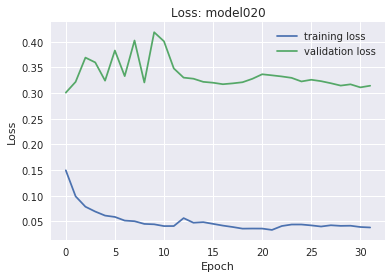

In [9]:
# Examing training curves for balanced
milsed.eval.report_results(OUTPUT_PATH, 'model020')

## MASTER COMPARISON of all results to date

In [20]:
# STATUS:
# model001: crnnL3[aug]:   completed after 8 hours
# model002: crnnL3[aug]:   completed after 28 hours
# model003: crnnL3[aug]:   completed after 11 hours
# model004: crnnL3[aug]:   completed after 34 hours
# model005: crnnL3[aug]:   completed after 64 hours
# model006: crnnL3_2[aug]: completed after 15 hours
# model007: crnnL3_3[aug]: completed after 21 hours
# model008: crnnL3_4[aug]: completed after 15 hours
# model009: crnnL3_5[aug]: completed after 13 hours
# model010: crnnL3_6[aug]: completed after 14 hours
# model011: crnnL3_7[aug]: completed after 16 hours
# model012: crnnL3_8[aug]: completed after 16 hours
# model013: crnnL3_7[aug][drc]: completed after 17 hours
# model014: crnnL3_8[aug][drc]: completed after 18 hours
# model015: crnnL3_9[aug][drc]: completed after 20 hours
# model016: crnnL3_10[aug][drc]: completed after 23 hours
# model017: crnnL3_9[aug]: completed after 21 hours
# model018: crnnL3_10[aug]: running for 19 hours...
# model019: crnnL3_9[aug](bal-bad): completed after 14 hours
# model020: crnnL3_7[aug](bal-bad): completed after 4 hours

models = []
for i in range(1, 10):
    models.append('model00{}'.format(i))
for i in range(10, 21):
    models.append('model0{}'.format(i))
    
df16 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=False)
df16

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model001,crnn2d3_smp,419797,0.15188,0.208333,0.404762,0.140264,0.25797,0.223815,0.304428,1.259
1,model002,crnn2d3_smp,419797,0.171824,0.233971,0.367491,0.171617,0.26482,0.1941,0.416609,1.80684
2,model003,crnn2d4_smp,420053,0.228153,0.278243,0.38,0.219472,0.271321,0.198058,0.430603,1.84928
3,model004,crnn2d4_smp,420053,0.252944,0.319196,0.493103,0.235974,0.28287,0.188786,0.563891,2.45767
4,model005,crnnL3_smp,9781205,0.351529,0.396266,0.53352,0.315182,0.372652,0.350141,0.398256,0.991741
5,model006,crnnL3_2_smp,858629,0.336414,0.382046,0.519886,0.30198,0.391399,0.373308,0.411333,0.930718
6,model007,crnnL3_3_smp,858629,0.356613,0.414006,0.550685,0.331683,0.405611,0.38557,0.42785,0.927736
7,model008,crnnL3_4_smp,2205957,0.347834,0.39375,0.533898,0.311881,0.390142,0.395475,0.384951,0.896536
8,model009,crnnL3_5_smp,1154309,0.332203,0.371245,0.530675,0.285479,0.394201,0.412591,0.37738,0.85226
9,model010,crnnL3_6_smp,2501637,0.336773,0.375267,0.53012,0.290429,0.375733,0.412103,0.345263,0.86373


(0, 0.5)

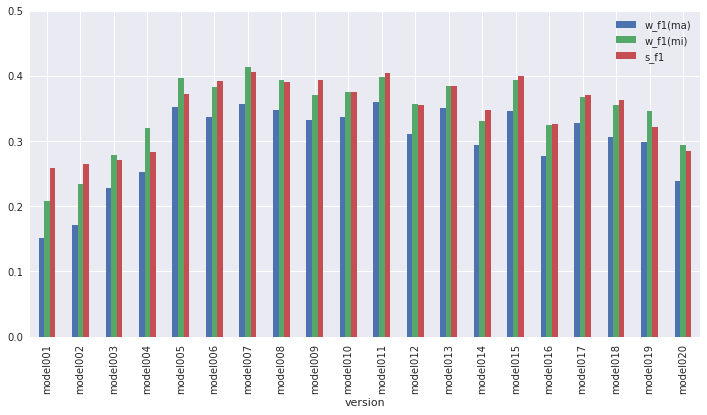

In [22]:
df16.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(12,6))
plt.ylim([0, 0.5])

(0.7, 1)

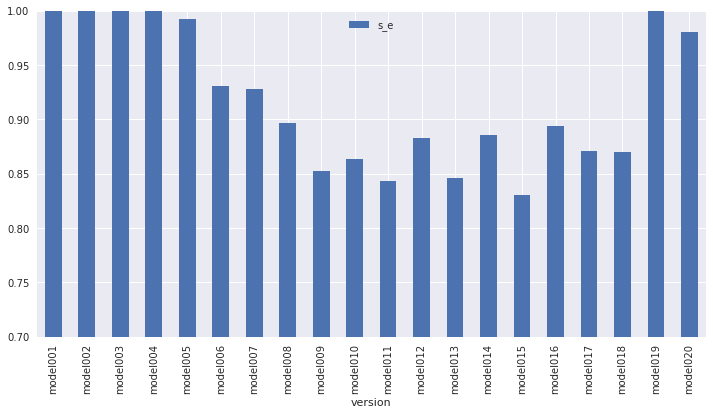

In [23]:
df16.plot.bar(x='version', y=['s_e'], figsize=(12,6))
plt.ylim([0.7, 1])

In [3]:
# Using weak from strong
models = []
for i in range(1, 10):
    models.append('model00{}'.format(i))
for i in range(10, 21):
    models.append('model0{}'.format(i))
    
df17 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=False)
df17

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model001,crnn2d3_smp,419797,0.263865,0.27986,0.200717,0.462046,0.25797,0.223815,0.304428,1.259
1,model002,crnn2d3_smp,419797,0.296185,0.263065,0.16,0.739274,0.26482,0.1941,0.416609,1.80684
2,model003,crnn2d4_smp,420053,0.276869,0.233512,0.137041,0.788779,0.271321,0.198058,0.430603,1.84928
3,model004,crnn2d4_smp,420053,0.288314,0.242012,0.140268,0.881188,0.28287,0.188786,0.563891,2.45767
4,model005,crnnL3_smp,9781205,0.430109,0.395556,0.298157,0.587459,0.372652,0.350141,0.398256,0.991741
5,model006,crnnL3_2_smp,858629,0.453447,0.438457,0.348588,0.590759,0.391399,0.373308,0.411333,0.930718
6,model007,crnnL3_3_smp,858629,0.464915,0.446191,0.352099,0.608911,0.405611,0.38557,0.42785,0.927736
7,model008,crnnL3_4_smp,2205957,0.439812,0.432765,0.369034,0.523102,0.390142,0.395475,0.384951,0.896536
8,model009,crnnL3_5_smp,1154309,0.454334,0.450995,0.407457,0.50495,0.394201,0.412591,0.37738,0.85226
9,model010,crnnL3_6_smp,2501637,0.424726,0.42915,0.421304,0.437294,0.375733,0.412103,0.345263,0.86373


(0, 0.5)

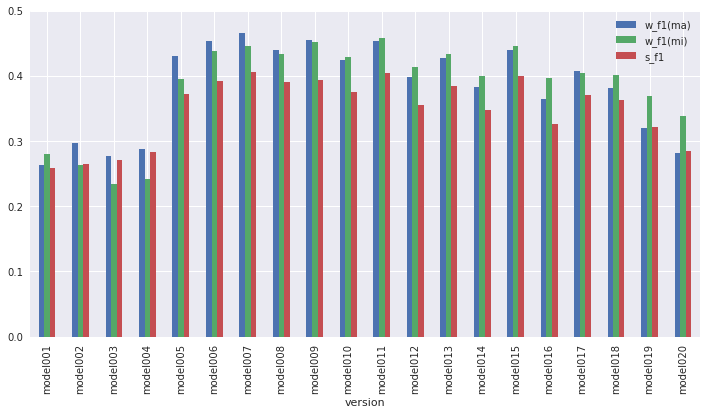

In [24]:
df17.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(12,6))
plt.ylim([0, 0.5])

(0.7, 1)

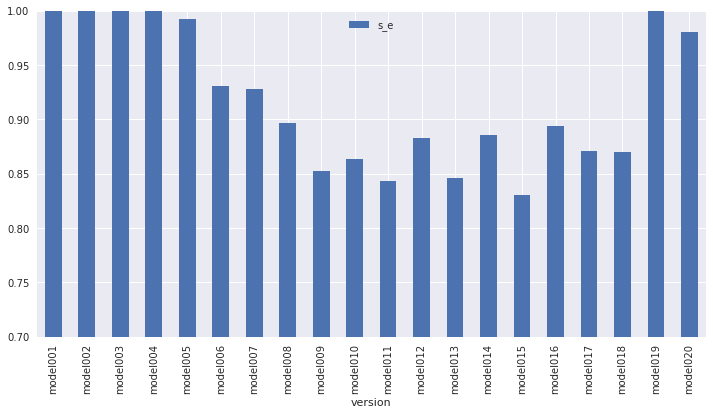

In [18]:
df17b.plot.bar(x='version', y=['s_e'], figsize=(12,6))
plt.ylim([0.7, 1])

## Using correct balanced training

Model     model021

Weak:
precision 0.388
f1        0.318
recall    0.269

Strong:
precision 0.272
recall    0.287
f1        0.280
e_rate    1.043

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.290	0.458	0.356	1.661
Ambulance (siren)                       nan	0.000	nan	1.000
Bicycle                                 0.075	0.242	0.115	3.739
Bus                                     nan	0.000	nan	1.000
Car                                     0.197	0.218	0.207	1.672
Car alarm                               0.170	0.640	0.269	3.476
Car passing by                          0.000	0.000	0.000	1.012
Civil defense siren                     0.521	0.545	0.533	0.955
Fire engine, fire truck (siren)         0.328	0.611	0.427	1.642
Motorcycle                              0.225	0.458	0.302	2.118
Police car (siren)                      0.330	0.269	0.297	1.277
Reversing beeps                         0.962	0.142	0.248	0.864
Screaming                               nan	

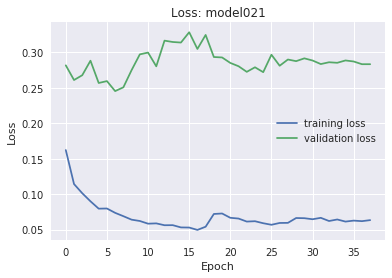

In [5]:
# Examing training curves for balanced
milsed.eval.report_results(OUTPUT_PATH, 'model021')

Still not great...

## Compare some ensembles!

In [6]:
# Using model weak pred
models = []
for i in range(1, 10):
    models.append('ensemble00{}'.format(i))
for i in range(10, 13):
    models.append('ensemble0{}'.format(i))
    
df18 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=True)
df18

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,ensemble001,ensemble001,ensemble,0.300445,0.360617,0.64135,0.250825,0.390893,0.549688,0.303281,0.775637
1,ensemble002,ensemble002,ensemble,0.317135,0.372768,0.575862,0.275578,0.409463,0.483006,0.355357,0.788713
2,ensemble003,ensemble003,ensemble,0.323884,0.391499,0.607639,0.288779,0.414309,0.495372,0.356045,0.779078
3,ensemble004,ensemble004,ensemble,0.331007,0.384018,0.586441,0.285479,0.409788,0.483911,0.355357,0.77816
4,ensemble005,ensemble005,ensemble,0.32057,0.376147,0.616541,0.270627,0.404482,0.500169,0.339527,0.789401
5,ensemble006,ensemble006,ensemble,0.298727,0.351981,0.599206,0.249175,0.391767,0.492361,0.325304,0.795366
6,ensemble007,ensemble007,ensemble,0.345478,0.399103,0.622378,0.293729,0.408269,0.501336,0.344345,0.774948
7,ensemble008,ensemble008,ensemble,0.312453,0.369089,0.613027,0.264026,0.403454,0.526802,0.32691,0.773572
8,ensemble009,ensemble009,ensemble,0.302025,0.358491,0.628099,0.250825,0.395172,0.528846,0.315439,0.77449
9,ensemble010,ensemble010,ensemble,0.319706,0.380184,0.629771,0.272277,0.410329,0.532991,0.333563,0.760725


(0, 0.5)

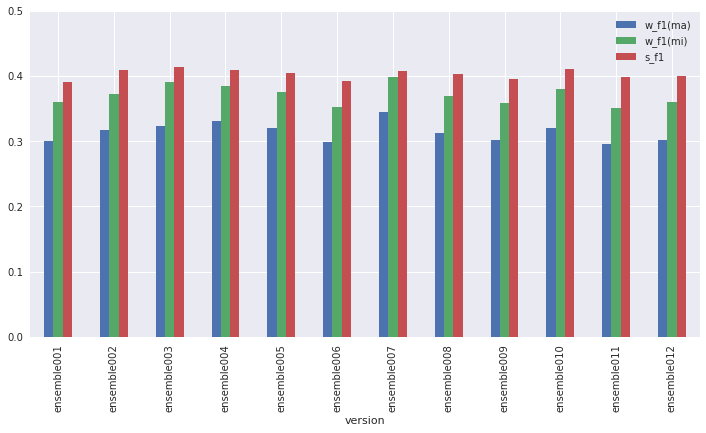

In [7]:
df18.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(12,6))
plt.ylim([0, 0.5])

(0.7, 1)

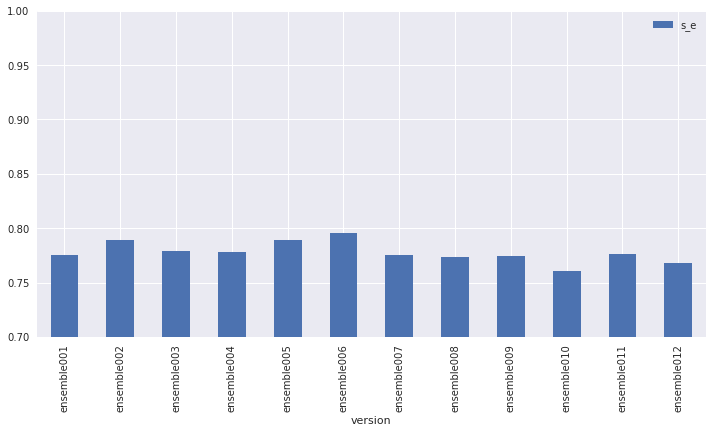

In [10]:
df18.plot.bar(x='version', y=['s_e'], figsize=(12,6))
plt.ylim([0.7, 1])

In [8]:
# Using weak from strong
models = []
for i in range(1, 10):
    models.append('ensemble00{}'.format(i))
for i in range(10, 13):
    models.append('ensemble0{}'.format(i))
    
df19 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=True)
df19

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,ensemble001,ensemble001,ensemble,0.391503,0.437181,0.573727,0.353135,0.390893,0.549688,0.303281,0.775637
1,ensemble002,ensemble002,ensemble,0.460997,0.473373,0.485269,0.462046,0.409463,0.483006,0.355357,0.788713
2,ensemble003,ensemble003,ensemble,0.444711,0.470175,0.501873,0.442244,0.414309,0.495372,0.356045,0.779078
3,ensemble004,ensemble004,ensemble,0.444362,0.47323,0.496377,0.452145,0.409788,0.483911,0.355357,0.77816
4,ensemble005,ensemble005,ensemble,0.43701,0.46,0.512146,0.417492,0.404482,0.500169,0.339527,0.789401
5,ensemble006,ensemble006,ensemble,0.4225,0.448615,0.489279,0.414191,0.391767,0.492361,0.325304,0.795366
6,ensemble007,ensemble007,ensemble,0.427294,0.451613,0.511482,0.40429,0.408269,0.501336,0.344345,0.774948
7,ensemble008,ensemble008,ensemble,0.429248,0.465779,0.549327,0.40429,0.403454,0.526802,0.32691,0.773572
8,ensemble009,ensemble009,ensemble,0.411459,0.442308,0.529954,0.379538,0.395172,0.528846,0.315439,0.77449
9,ensemble010,ensemble010,ensemble,0.420262,0.454805,0.537079,0.394389,0.410329,0.532991,0.333563,0.760725


(0, 0.5)

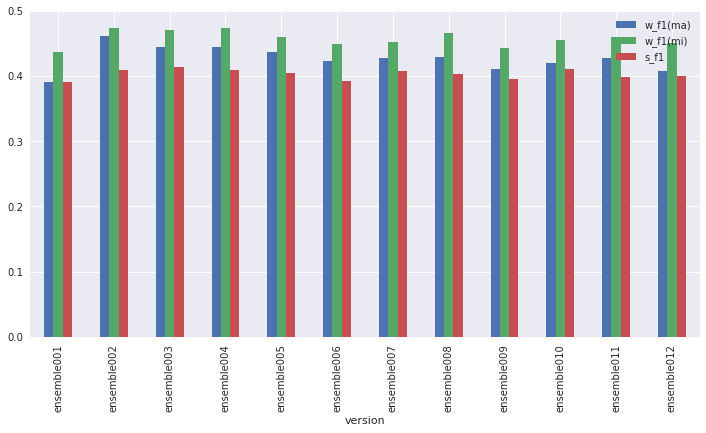

In [9]:
df19.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(12,6))
plt.ylim([0, 0.5])

(0.7, 1)

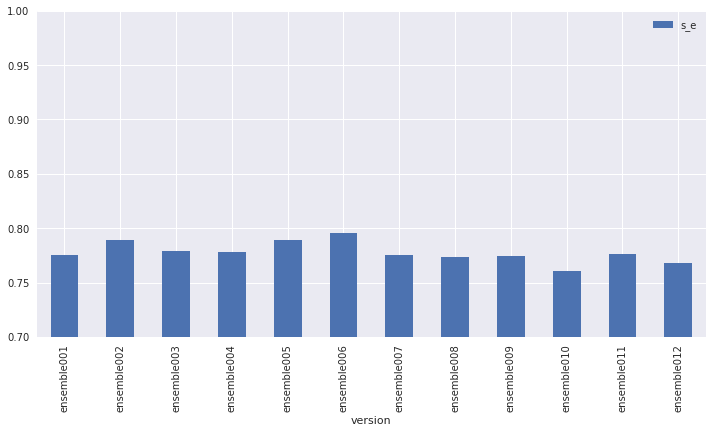

In [11]:
df19.plot.bar(x='version', y=['s_e'], figsize=(12,6))
plt.ylim([0.7, 1])

### Observations
Ensembling doesn't really help weak predictions (or strong in terms of f1), but it *does* help in terms of reducing the error rate. So choose single model to maximize weak/strong f1, and single ensemble to minimize error rate!

## Eval last set of new models

In [24]:
models = (['model007', 'model009', 'model011', 'model013', 'model015', 'model017', 'model022', 
           'model023', 'model024', 'model025bm', 'model026bm'])
    
dfL = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=False)
dfL

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model007,crnnL3_3_smp,858629,0.356613,0.414006,0.550685,0.331683,0.405611,0.38557,0.42785,0.927736
1,model009,crnnL3_5_smp,1154309,0.332203,0.371245,0.530675,0.285479,0.394201,0.412591,0.37738,0.85226
2,model011,crnnL3_7_smp,1449989,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
3,model013,crnnL3_7_smp,1449989,0.351099,0.384937,0.525714,0.30363,0.384625,0.405076,0.366139,0.846295
4,model015,crnnL3_9_smp,1647029,0.346027,0.39327,0.542029,0.308581,0.399378,0.417083,0.383115,0.830466
5,model017,crnnL3_9_smp,1647029,0.327848,0.367304,0.514881,0.285479,0.370606,0.39753,0.347098,0.870383
6,model022,crnnL3_11_smp,2041109,0.282546,0.330377,0.503378,0.245875,0.347,0.381214,0.318422,0.889195
7,model023,crnnL3_12_smp,8214021,0.331948,0.385185,0.536873,0.30033,0.386269,0.413117,0.362698,0.846295
8,model024,crnnL3_12_smp,8214021,0.364925,0.408805,0.560345,0.321782,0.404693,0.427987,0.383804,0.831613
9,model025bm,crnnL3_7_max,1449989,0.319501,0.371398,0.52568,0.287129,0.266408,0.576776,0.173205,0.864418


(0, 0.5)

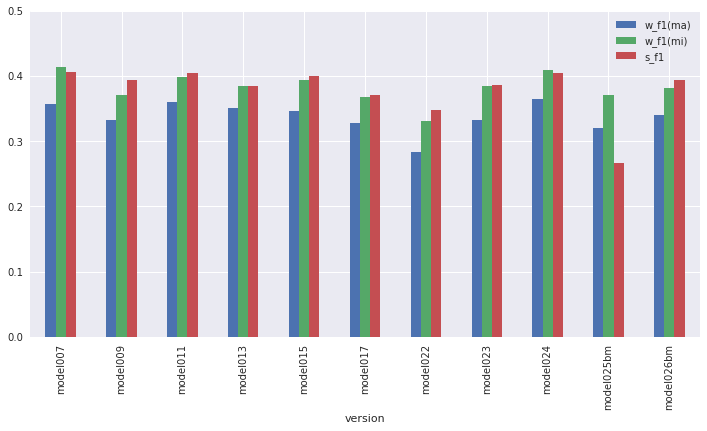

In [25]:
dfL.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(12,6))
plt.ylim([0, 0.5])

(0.7, 1)

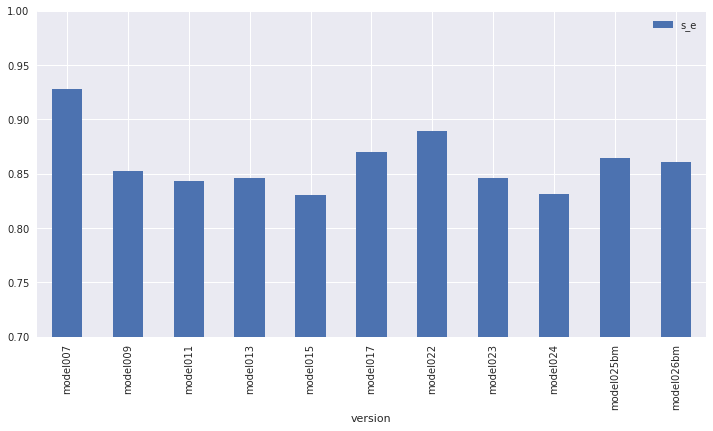

In [26]:
dfL.plot.bar(x='version', y=['s_e'], figsize=(12,6))
plt.ylim([0.7, 1])

In [27]:
models = (['model007', 'model009', 'model011', 'model013', 'model015', 'model017', 'model022', 
           'model023', 'model024', 'model025bm', 'model026bm'])
    
dfL2 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=False)
dfL2

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model007,crnnL3_3_smp,858629,0.464915,0.446191,0.352099,0.608911,0.405611,0.38557,0.42785,0.927736
1,model009,crnnL3_5_smp,1154309,0.454334,0.450995,0.407457,0.50495,0.394201,0.412591,0.37738,0.85226
2,model011,crnnL3_7_smp,1449989,0.453196,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
3,model013,crnnL3_7_smp,1449989,0.427303,0.433202,0.415781,0.452145,0.384625,0.405076,0.366139,0.846295
4,model015,crnnL3_9_smp,1647029,0.439868,0.445306,0.420205,0.473597,0.399378,0.417083,0.383115,0.830466
5,model017,crnnL3_9_smp,1647029,0.40726,0.403785,0.386707,0.422442,0.370606,0.39753,0.347098,0.870383
6,model022,crnnL3_11_smp,2041109,0.39833,0.395588,0.356764,0.443894,0.347,0.381214,0.318422,0.889195
7,model023,crnnL3_12_smp,8214021,0.421249,0.433007,0.428803,0.437294,0.386269,0.413117,0.362698,0.846295
8,model024,crnnL3_12_smp,8214021,0.443973,0.450586,0.457483,0.443894,0.404693,0.427987,0.383804,0.831613
9,model025bm,crnnL3_7_max,1449989,0.317094,0.370053,0.525836,0.285479,0.266408,0.576776,0.173205,0.864418


(0, 0.5)

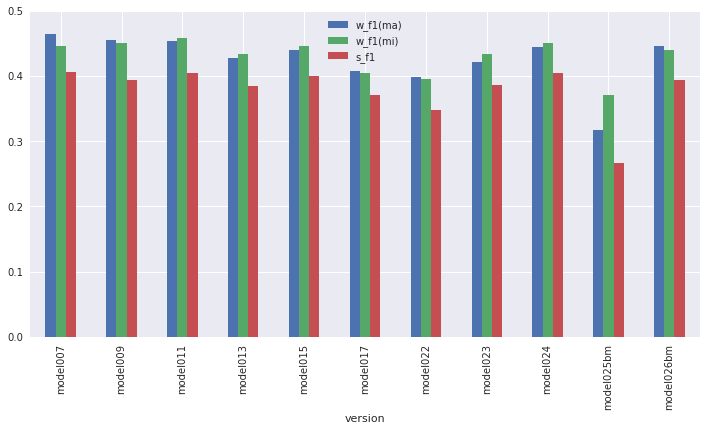

In [28]:
dfL2.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(12,6))
plt.ylim([0, 0.5])

(0.7, 1)

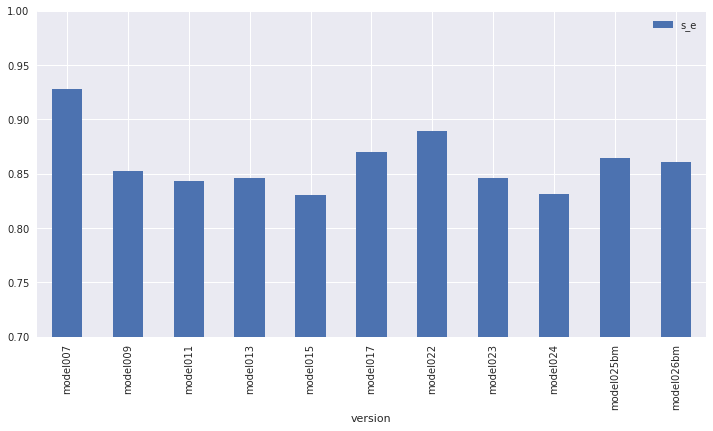

In [29]:
dfL2.plot.bar(x='version', y=['s_e'], figsize=(12,6))
plt.ylim([0.7, 1])

Model     model024

Weak:
f1        0.409
precision 0.560
recall    0.322

Strong:
precision 0.428
recall    0.384
f1        0.405
e_rate    0.832

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.537	0.266	0.355	0.964
Ambulance (siren)                       0.667	0.155	0.251	0.923
Bicycle                                 0.269	0.217	0.241	1.373
Bus                                     0.274	0.115	0.162	1.190
Car                                     0.213	0.758	0.333	3.040
Car alarm                               0.562	0.110	0.184	0.976
Car passing by                          nan	0.000	nan	1.000
Civil defense siren                     0.707	0.914	0.797	0.466
Fire engine, fire truck (siren)         0.549	0.523	0.536	0.907
Motorcycle                              0.421	0.401	0.411	1.151
Police car (siren)                      0.466	0.502	0.483	1.074
Reversing beeps                         1.000	0.341	0.508	0.659
Screaming                               

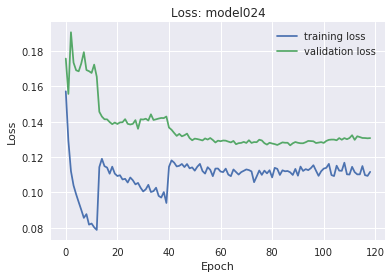

In [17]:
milsed.eval.report_results(OUTPUT_PATH, 'model024')

Model     model011

Weak:
precision 0.526
f1        0.398
recall    0.320

Strong:
precision 0.423
recall    0.387
f1        0.404
e_rate    0.843

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.557	0.203	0.298	0.958
Ambulance (siren)                       0.500	0.162	0.245	1.000
Bicycle                                 0.216	0.248	0.231	1.652
Bus                                     0.376	0.168	0.233	1.111
Car                                     0.211	0.720	0.326	2.981
Car alarm                               0.792	0.116	0.202	0.915
Car passing by                          0.056	0.004	0.007	1.064
Civil defense siren                     0.744	0.903	0.816	0.407
Fire engine, fire truck (siren)         0.457	0.495	0.475	1.093
Motorcycle                              0.402	0.358	0.379	1.175
Police car (siren)                      0.507	0.550	0.527	0.985
Reversing beeps                         0.792	0.324	0.460	0.761
Screaming                           

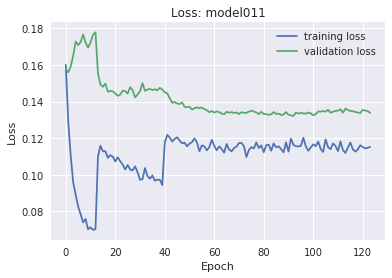

In [18]:
milsed.eval.report_results(OUTPUT_PATH, 'model011')

## BIG QUESTION: do the observations hold when we evaluate against the validation set instead of the test set? MUST FIND OUT.

In [3]:
# Using weak from strong
models = []
for i in range(1, 10):
    models.append('model00{}'.format(i))
for i in range(10, 25):
    models.append('model0{}'.format(i))
    
models.append('model025bm')
models.append('model026bm')
    
df20 = milsed.eval.compare_results_validation(
    OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=False, skip_model_size=True)
df20

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi)
0,model001,model001,skip,0.171645,0.432521,0.629041,0.329562
1,model002,model002,skip,0.219528,0.475878,0.632268,0.381512
2,model003,model003,skip,0.27476,0.482873,0.578613,0.414318
3,model004,model004,skip,0.281075,0.49902,0.666706,0.398733
4,model005,model005,skip,0.356674,0.520997,0.627469,0.445417
5,model006,model006,skip,0.353015,0.539288,0.664582,0.453743
6,model007,model007,skip,0.346318,0.525717,0.658456,0.437518
7,model008,model008,skip,0.346602,0.506702,0.633134,0.42236
8,model009,model009,skip,0.360768,0.533537,0.661819,0.446911
9,model010,model010,skip,0.345847,0.521076,0.649559,0.435027


(0, 0.6)

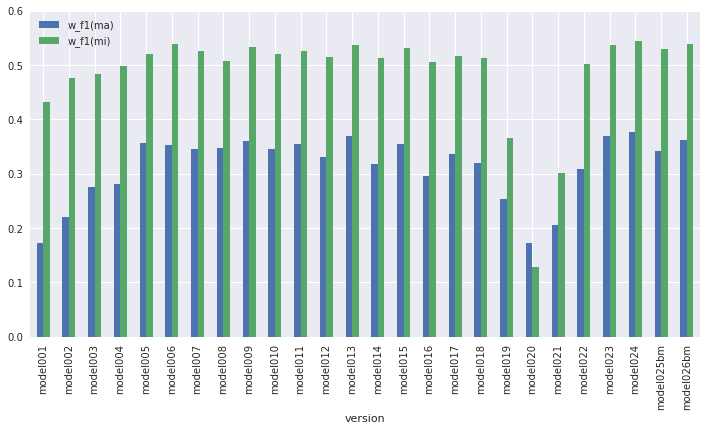

In [4]:
df20.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)'], figsize=(12,6))
plt.ylim([0, 0.6])

In [5]:
# Using weak from strong
models = []
for i in range(1, 10):
    models.append('model00{}'.format(i))
for i in range(10, 25):
    models.append('model0{}'.format(i))
    
models.append('model025bm')
models.append('model026bm')
    
df21 = milsed.eval.compare_results_validation(
    OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=False, skip_model_size=True)
df21

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi)
0,model001,model001,skip,0.270022,0.424848,0.306978,0.689653
1,model002,model002,skip,0.231486,0.315346,0.191546,0.891617
2,model003,model003,skip,0.2087,0.268701,0.156797,0.938514
3,model004,model004,skip,0.20494,0.261804,0.15132,0.970111
4,model005,model005,skip,0.376206,0.481335,0.360392,0.724452
5,model006,model006,skip,0.396406,0.531964,0.428224,0.702035
6,model007,model007,skip,0.392054,0.523941,0.418073,0.701608
7,model008,model008,skip,0.397388,0.526483,0.442373,0.650085
8,model009,model009,skip,0.402378,0.548264,0.495517,0.613578
9,model010,model010,skip,0.393262,0.547977,0.522317,0.576288


(0, 0.6)

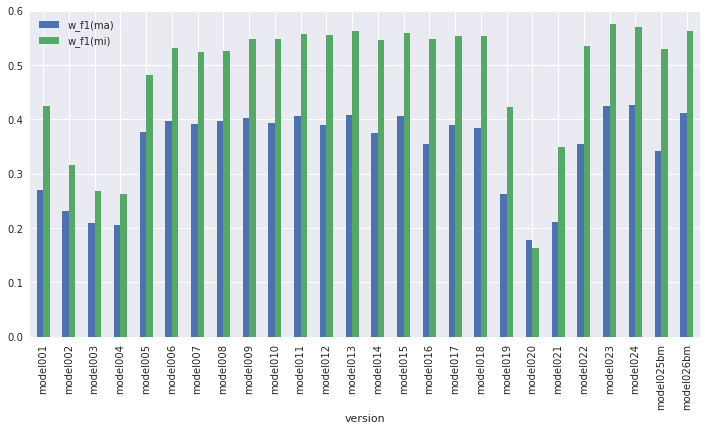

In [6]:
df21.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)'], figsize=(12,6))
plt.ylim([0, 0.6])

# FOCUS ON BEST TWO MODELS: 11 and 24

In [7]:
models = (['model011', 'model024'])
    
dfB = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=False)
dfB

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,crnnL3_7_smp,1449989,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
1,model024,crnnL3_12_smp,8214021,0.364925,0.408805,0.560345,0.321782,0.404693,0.427987,0.383804,0.831613


In [8]:
models = (['model011', 'model024'])
    
dfB2 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=False)
dfB2

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,crnnL3_7_smp,1449989,0.453196,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
1,model024,crnnL3_12_smp,8214021,0.443973,0.450586,0.457483,0.443894,0.404693,0.427987,0.383804,0.831613


Model     model011

Weak:
f1        0.398
recall    0.320
precision 0.526

Strong:
precision 0.423
recall    0.387
f1        0.404
e_rate    0.843

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.557	0.203	0.298	0.958
Ambulance (siren)                       0.500	0.162	0.245	1.000
Bicycle                                 0.216	0.248	0.231	1.652
Bus                                     0.376	0.168	0.233	1.111
Car                                     0.211	0.720	0.326	2.981
Car alarm                               0.792	0.116	0.202	0.915
Car passing by                          0.056	0.004	0.007	1.064
Civil defense siren                     0.744	0.903	0.816	0.407
Fire engine, fire truck (siren)         0.457	0.495	0.475	1.093
Motorcycle                              0.402	0.358	0.379	1.175
Police car (siren)                      0.507	0.550	0.527	0.985
Reversing beeps                         0.792	0.324	0.460	0.761
Screaming                           

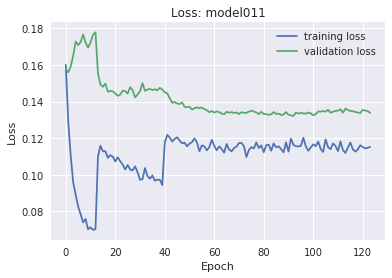

In [9]:
milsed.eval.report_results(OUTPUT_PATH, 'model011')

Model     model024

Weak:
f1        0.409
recall    0.322
precision 0.560

Strong:
precision 0.428
recall    0.384
f1        0.405
e_rate    0.832

Strong per-class:                       P	R	F	E
Air horn, truck horn                    0.537	0.266	0.355	0.964
Ambulance (siren)                       0.667	0.155	0.251	0.923
Bicycle                                 0.269	0.217	0.241	1.373
Bus                                     0.274	0.115	0.162	1.190
Car                                     0.213	0.758	0.333	3.040
Car alarm                               0.562	0.110	0.184	0.976
Car passing by                          nan	0.000	nan	1.000
Civil defense siren                     0.707	0.914	0.797	0.466
Fire engine, fire truck (siren)         0.549	0.523	0.536	0.907
Motorcycle                              0.421	0.401	0.411	1.151
Police car (siren)                      0.466	0.502	0.483	1.074
Reversing beeps                         1.000	0.341	0.508	0.659
Screaming                               

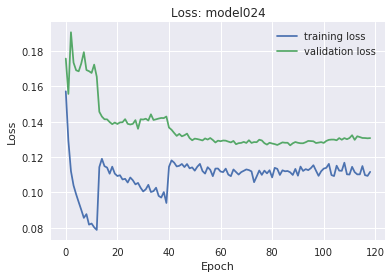

In [10]:
milsed.eval.report_results(OUTPUT_PATH, 'model024')

In [12]:
models = (['model011', 'model024'])
    
dfB3 = milsed.eval.compare_results_validation(OUTPUT_PATH, models, sort=False, weak_from_strong=False, 
                                              is_ensemble=False, skip_model_size=True)
dfB3

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi)
0,model011,model011,skip,0.354488,0.525865,0.661028,0.436593
1,model024,model024,skip,0.376319,0.544827,0.678951,0.454953


In [13]:
models = (['model011', 'model024'])
    
dfB3 = milsed.eval.compare_results_validation(OUTPUT_PATH, models, sort=False, weak_from_strong=True, 
                                              is_ensemble=False, skip_model_size=True)
dfB3

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi)
0,model011,model011,skip,0.406577,0.556403,0.528925,0.586892
1,model024,model024,skip,0.426582,0.570592,0.559246,0.582408


## Check large set of ensembles

In [27]:
models = []
for i in range(20, 100):
    models.append('ensemble0{}'.format(i))
for i in range(100, 140):
    models.append('ensemble{}'.format(i))

dfE = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=True)

(0.3, 0.5)

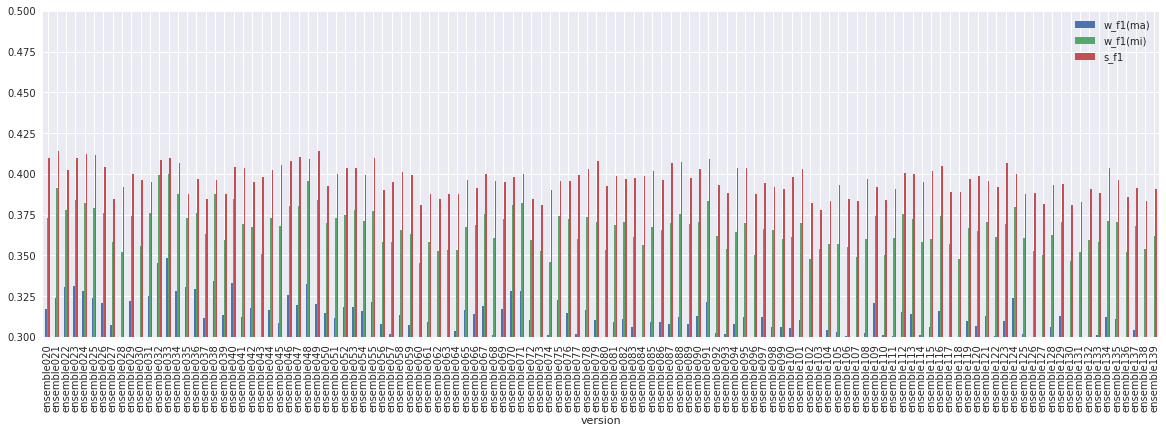

In [31]:
dfE.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(20,6))
plt.ylim([0.3, 0.5])

(0.7, 0.85)

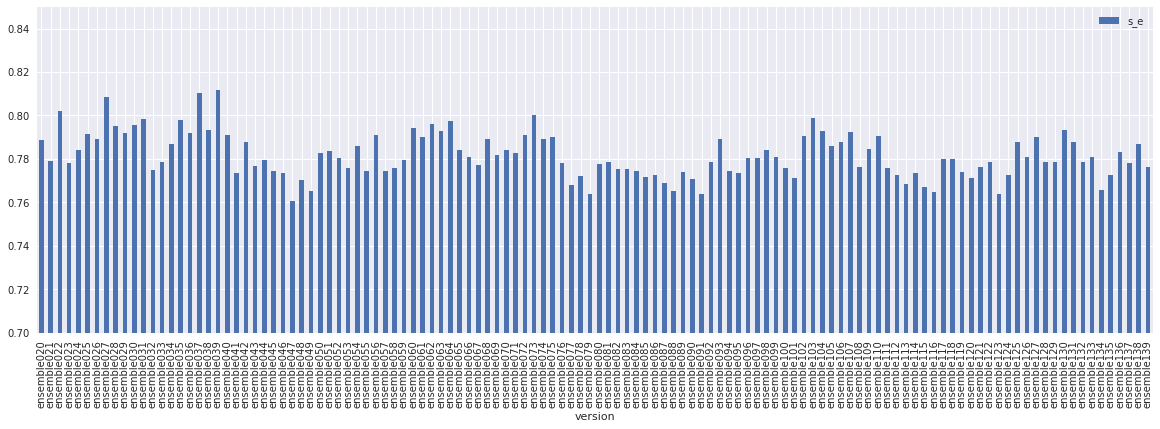

In [35]:
dfE.plot.bar(x='version', y=['s_e'], figsize=(20,6))
plt.ylim([0.7, 0.85])

In [29]:
models = []
for i in range(20, 100):
    models.append('ensemble0{}'.format(i))
for i in range(100, 140):
    models.append('ensemble{}'.format(i))

dfE2 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=True)

(0.3, 0.5)

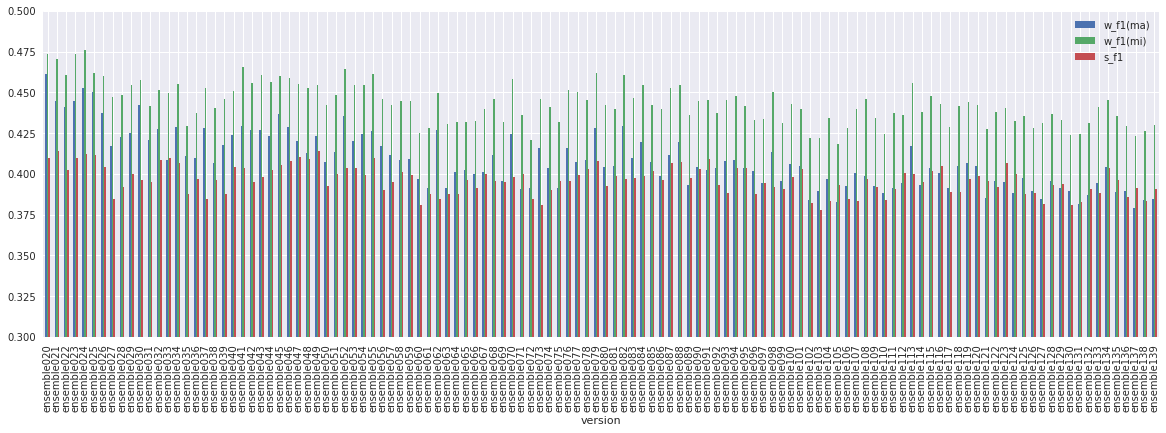

In [32]:
dfE2.plot.bar(x='version', y=['w_f1(ma)', 'w_f1(mi)', 's_f1'], figsize=(20,6))
plt.ylim([0.3, 0.5])

In [36]:
dfE

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,ensemble020,ensemble020,ensemble,0.317135,0.372768,0.575862,0.275578,0.409463,0.483006,0.355357,0.788713
1,ensemble021,ensemble021,ensemble,0.323884,0.391499,0.607639,0.288779,0.414309,0.495372,0.356045,0.779078
2,ensemble022,ensemble022,ensemble,0.330667,0.377953,0.59364,0.277228,0.402454,0.480573,0.34618,0.802248
3,ensemble023,ensemble023,ensemble,0.331007,0.384018,0.586441,0.285479,0.409788,0.483911,0.355357,0.77816
4,ensemble024,ensemble024,ensemble,0.328029,0.382123,0.591696,0.282178,0.412388,0.487332,0.357421,0.784354
5,ensemble025,ensemble025,ensemble,0.32367,0.379157,0.577703,0.282178,0.411266,0.476435,0.36178,0.791466
6,ensemble026,ensemble026,ensemble,0.32057,0.376147,0.616541,0.270627,0.404482,0.500169,0.339527,0.789401
7,ensemble027,ensemble027,ensemble,0.307332,0.358039,0.579336,0.259076,0.384753,0.478187,0.321863,0.808672
8,ensemble028,ensemble028,ensemble,0.298727,0.351981,0.599206,0.249175,0.391767,0.492361,0.325304,0.795366
9,ensemble029,ensemble029,ensemble,0.321771,0.374002,0.605166,0.270627,0.399612,0.504549,0.33081,0.792154


In [37]:
dfE2

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,ensemble020,ensemble020,ensemble,0.460997,0.473373,0.485269,0.462046,0.409463,0.483006,0.355357,0.788713
1,ensemble021,ensemble021,ensemble,0.444711,0.470175,0.501873,0.442244,0.414309,0.495372,0.356045,0.779078
2,ensemble022,ensemble022,ensemble,0.440992,0.460331,0.487985,0.435644,0.402454,0.480573,0.34618,0.802248
3,ensemble023,ensemble023,ensemble,0.444362,0.47323,0.496377,0.452145,0.409788,0.483911,0.355357,0.77816
4,ensemble024,ensemble024,ensemble,0.452683,0.476024,0.504621,0.450495,0.412388,0.487332,0.357421,0.784354
5,ensemble025,ensemble025,ensemble,0.45026,0.462052,0.467116,0.457096,0.411266,0.476435,0.36178,0.791466
6,ensemble026,ensemble026,ensemble,0.43701,0.46,0.512146,0.417492,0.404482,0.500169,0.339527,0.789401
7,ensemble027,ensemble027,ensemble,0.417344,0.447102,0.505198,0.40099,0.384753,0.478187,0.321863,0.808672
8,ensemble028,ensemble028,ensemble,0.4225,0.448615,0.489279,0.414191,0.391767,0.492361,0.325304,0.795366
9,ensemble029,ensemble029,ensemble,0.424755,0.454283,0.545035,0.389439,0.399612,0.504549,0.33081,0.792154


## Compare final set of candidates

In [42]:
models = ['model011', 'model024', 'ensemble024', 'ensemble047', 'ensemble079']
dfFIN = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=True)
dfFIN

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,model011,ensemble,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
1,model024,model024,ensemble,0.364925,0.408805,0.560345,0.321782,0.404693,0.427987,0.383804,0.831613
2,ensemble024,ensemble024,ensemble,0.328029,0.382123,0.591696,0.282178,0.412388,0.487332,0.357421,0.784354
3,ensemble047,ensemble047,ensemble,0.319706,0.380184,0.629771,0.272277,0.410329,0.532991,0.333563,0.760725
4,ensemble079,ensemble079,ensemble,0.3101,0.370198,0.628458,0.262376,0.408023,0.543304,0.32668,0.763707


In [43]:
models = ['model011', 'model024', 'ensemble024', 'ensemble047', 'ensemble079']
dfFIN2 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=True)
dfFIN2

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,model011,ensemble,0.453196,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
1,model024,model024,ensemble,0.443973,0.450586,0.457483,0.443894,0.404693,0.427987,0.383804,0.831613
2,ensemble024,ensemble024,ensemble,0.452683,0.476024,0.504621,0.450495,0.412388,0.487332,0.357421,0.784354
3,ensemble047,ensemble047,ensemble,0.420262,0.454805,0.537079,0.394389,0.410329,0.532991,0.333563,0.760725
4,ensemble079,ensemble079,ensemble,0.428029,0.461538,0.562945,0.391089,0.408023,0.543304,0.32668,0.763707


In [45]:
models = ['model011', 'model024', 'model026bm', 'ensemble024', 'ensemble047']
dfFIN3 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=True)
dfFIN3

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,model011,ensemble,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
1,model024,model024,ensemble,0.364925,0.408805,0.560345,0.321782,0.404693,0.427987,0.383804,0.831613
2,model026bm,model026bm,ensemble,0.340101,0.381857,0.52924,0.29868,0.3934,0.404508,0.382886,0.860518
3,ensemble024,ensemble024,ensemble,0.328029,0.382123,0.591696,0.282178,0.412388,0.487332,0.357421,0.784354
4,ensemble047,ensemble047,ensemble,0.319706,0.380184,0.629771,0.272277,0.410329,0.532991,0.333563,0.760725


In [46]:
models = ['model011', 'model024', 'model026bm', 'ensemble024', 'ensemble047']
dfFIN4 = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=True)
dfFIN4

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,model011,ensemble,0.453196,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
1,model024,model024,ensemble,0.443973,0.450586,0.457483,0.443894,0.404693,0.427987,0.383804,0.831613
2,model026bm,model026bm,ensemble,0.446073,0.439674,0.398658,0.490099,0.3934,0.404508,0.382886,0.860518
3,ensemble024,ensemble024,ensemble,0.452683,0.476024,0.504621,0.450495,0.412388,0.487332,0.357421,0.784354
4,ensemble047,ensemble047,ensemble,0.420262,0.454805,0.537079,0.394389,0.410329,0.532991,0.333563,0.760725


## For abstract

In [56]:
models = ['model011', 'model026bm', 'ensemble047']
dfABS = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=True)
dfABS

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,model011,ensemble,0.360094,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
1,model026bm,model026bm,ensemble,0.340101,0.381857,0.52924,0.29868,0.3934,0.404508,0.382886,0.860518
2,ensemble047,ensemble047,ensemble,0.319706,0.380184,0.629771,0.272277,0.410329,0.532991,0.333563,0.760725


In [57]:
dfABS2 = dfABS[['model', 'n_weights', 'w_f1(mi)', 'w_p(mi)', 'w_r(mi)', 's_f1', 's_p', 's_r', 's_e']]

In [58]:
dfABS2

,model,n_weights,w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,ensemble,0.397949,0.525745,0.320132,0.404454,0.42299,0.387474,0.842854
1,model026bm,ensemble,0.381857,0.52924,0.29868,0.3934,0.404508,0.382886,0.860518
2,ensemble047,ensemble,0.380184,0.629771,0.272277,0.410329,0.532991,0.333563,0.760725


In [59]:
dfABS2.to_latex()

'\\begin{tabular}{llllllllll}\n\\toprule\n{} &        model & n\\_weights &  w\\_f1(mi) &   w\\_p(mi) &   w\\_r(mi) &      s\\_f1 &       s\\_p &       s\\_r &       s\\_e \\\\\n\\midrule\n0 &     model011 &  ensemble &  0.397949 &  0.525745 &  0.320132 &  0.404454 &   0.42299 &  0.387474 &  0.842854 \\\\\n1 &   model026bm &  ensemble &  0.381857 &   0.52924 &   0.29868 &    0.3934 &  0.404508 &  0.382886 &  0.860518 \\\\\n2 &  ensemble047 &  ensemble &  0.380184 &  0.629771 &  0.272277 &  0.410329 &  0.532991 &  0.333563 &  0.760725 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [60]:
models = ['model011', 'model026bm', 'ensemble047']
dfABS = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=True, is_ensemble=True)
dfABS

,version,model,n_weights,w_f1(ma),w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,model011,ensemble,0.453196,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
1,model026bm,model026bm,ensemble,0.446073,0.439674,0.398658,0.490099,0.3934,0.404508,0.382886,0.860518
2,ensemble047,ensemble047,ensemble,0.420262,0.454805,0.537079,0.394389,0.410329,0.532991,0.333563,0.760725


In [61]:
dfABS2 = dfABS[['model', 'n_weights', 'w_f1(mi)', 'w_p(mi)', 'w_r(mi)', 's_f1', 's_p', 's_r', 's_e']]

In [62]:
dfABS2

,model,n_weights,w_f1(mi),w_p(mi),w_r(mi),s_f1,s_p,s_r,s_e
0,model011,ensemble,0.458568,0.44741,0.470297,0.404454,0.42299,0.387474,0.842854
1,model026bm,ensemble,0.439674,0.398658,0.490099,0.3934,0.404508,0.382886,0.860518
2,ensemble047,ensemble,0.454805,0.537079,0.394389,0.410329,0.532991,0.333563,0.760725


In [63]:
dfABS2.to_latex()

'\\begin{tabular}{llllllllll}\n\\toprule\n{} &        model & n\\_weights &  w\\_f1(mi) &   w\\_p(mi) &   w\\_r(mi) &      s\\_f1 &       s\\_p &       s\\_r &       s\\_e \\\\\n\\midrule\n0 &     model011 &  ensemble &  0.458568 &   0.44741 &  0.470297 &  0.404454 &   0.42299 &  0.387474 &  0.842854 \\\\\n1 &   model026bm &  ensemble &  0.439674 &  0.398658 &  0.490099 &    0.3934 &  0.404508 &  0.382886 &  0.860518 \\\\\n2 &  ensemble047 &  ensemble &  0.454805 &  0.537079 &  0.394389 &  0.410329 &  0.532991 &  0.333563 &  0.760725 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# for weights
models = ['model011', 'model026bm', 'ensemble047']
dfABS = milsed.eval.compare_results(OUTPUT_PATH, models, sort=False, weak_from_strong=False, is_ensemble=True)
dfABS